CSC 475 Assignment 3 - Christian Knowles V00874629 This submission will attempt all problems

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal 
from scipy.interpolate import interp1d 
import IPython.display as ipd

In [11]:
#Question 1.1 - Average Magnitude Difference Function

def pitch_amdf(frame, srate):
    delays = len(frame)//2
    output = np.zeros(delays)
    for x in np.arange(0,delays):
        for y in np.arange(0,delays):
            output[x] += abs(frame[y]-frame[y+x])
    valley = signal.argrelextrema(output, np.less)
    if(len(valley[0])==0):
        return 0 #no valley in data so unable to return pitch estimate
    pitch_estimate = srate / valley[0][0]
    return pitch_estimate

[  0.          10.33231517  20.65167545  30.9435834   41.20261236
  51.40985803  61.56451022  71.64334675  81.65019138  91.55760915
 101.3740562  111.06800545 120.65252442 130.09212943 139.40445903
 148.55022257 157.55156979 166.36556612 175.0187933  183.46484847
 191.73464702 199.77850527 207.63155499 215.24103015 222.64614316
 229.79125426 236.71950279 243.3725932  249.79742063 255.93326017
 261.83057495 267.42644477 272.77469701 277.81045703 282.59069776
 287.04883685 291.24476003 295.11042912 298.70839685 301.96942539
 304.95847685 307.60537325 310.06973811 312.21856088 314.18559924
 315.83560254 317.30389637 318.45349661 319.42074587 320.06745107
 320.53042822 320.670816   320.62536974 320.1443082  319.46145689
 318.34290292 317.02158032 315.26627299 313.30812266 310.91953239
 308.32895695 305.31332565 302.09752111 298.46388704 294.63286137
 290.39306767 285.95964271 281.12832913 276.10812522 270.70270226
 265.11410509 259.15471024 253.01881963 246.52825554 239.86881601
 232.87247

[  0.          12.18819344  24.35039541  36.46817304  48.52531919
  60.50258283  72.38510363  84.15293393  95.79265626 107.28374937
 118.61432412 129.7634093  140.72071837 151.46495331 161.98749264
 172.2668336  182.29606984 192.05361392 201.53431213 210.71660978
 219.59713048 228.15446645 236.38703042 244.27367197 251.81459199
 258.98900364 265.81461795 272.36588298 278.55805727 284.46943946
 290.01139858 295.26555156 300.13528253 304.57353256 308.61319124
 312.20720481 315.39062755 318.11669283 320.42244592 322.26168777
 323.67326985 324.61183765 325.1178534  325.14707865 324.74138098
 323.85790209 322.53970031 320.74555221 318.51948382 315.82215027
 312.69831464 309.11074155 305.10469391 300.64526237 295.77796696
 290.4704252  284.76816714 278.64152093 272.13577648 265.22413823
 257.95140394 250.29380095 242.29538253 233.93552563 225.25728785
 216.24330203 206.93538153 197.31950059 187.435984   177.27421177
 166.87278171 156.2245229  145.36607524 134.29373909 123.04197477
 111.61055

[  0.          12.01870739  24.00930408  35.96403582  47.87353428
  59.73091449  71.52596443  83.25252484  94.88125761 106.39170301
 117.7718645  129.00049616 140.06686989 150.94908293 161.63774783
 172.1104404  182.35918094 192.36116436 202.10987996 211.58228616
 220.77339606 229.66007871 238.23891851 246.48684382 254.40204984
 261.96167312 269.16555058 275.99117472 282.44004586 288.49015788
 294.14468628 299.38226814 304.20775562 308.60056591 312.56721852
 316.08804174 319.17120192 321.79806231 323.9784043  325.6947418
 326.95842796 327.75323403 328.09203012 327.95994169 327.37128964
 326.31263998 324.79968713 322.82051284 320.39209709 317.50410109
 314.17469211 310.39516271 306.18475965 301.53644673 296.47043351
 290.98138293 285.09034273 278.79369089 272.1131817  265.04691243
 257.61720632 249.82387274 241.6896615  233.216076   224.42614657
 215.32304208 205.92992503 196.2515914  186.31118642 176.11508565
 165.68626781 155.03263212 144.17684301 133.1282598  121.90908766
 110.530075

[  0.          12.16208562  24.31838084  36.452075    48.54422681
  60.57909064  72.53673917  84.40259719  96.15588074 107.7832853
 119.2633055  130.58400171 141.72328718 152.67067424 163.40363824
 173.91322257 184.17661041 194.18644636 203.91976812 213.37088189
 222.5168263  231.35361899 239.8584444  248.02907025 255.84296896
 263.29968515 270.37711756 277.07660226 283.3765977  289.28023339
 294.766655   299.84077458 304.48254576 308.69863935 312.46993013
 315.80481102 318.6851829  321.12111146 323.09561988 324.62038496
 325.67963916 326.28659686 326.42677719 326.11484737 325.33768087
 324.11130242 322.42399767 320.29304384 317.70818676 314.68784238
 311.22325499 307.33385775 303.01242219 298.27927054 293.12872107
 287.58185152 281.63453754 275.30847447 268.60109749 261.53457866
 254.10790681 246.34358798 238.30553024 229.99369952 221.42016666
 212.58513924 203.50011371 194.16566918 184.55195024 174.66351978
 164.5216483  154.13264286 143.51769866 132.68483864 121.65507028
 110.438091

  24.76024235]
[  0.          12.06049555  24.08822903  36.06551393  47.97692242
  59.80401257  71.53275688  83.16081505  94.68819704 106.09775052
 117.3918842  128.55103218 139.57981412 150.43257059 161.08730138
 171.5354843  181.75464247 191.73766627 201.46174131 210.92122546
 220.09310995 228.97326887 237.53864497 245.78667039 253.69438694
 261.26081909 268.46325554 275.3023392  281.75575262 287.82577447
 293.49062582 298.75422915 303.59548527 308.01995859 312.0073662
 315.56490235 318.673231   321.3411535  323.5504043  325.31135823
 326.60693572 327.44904049 327.82188542 327.73884739 327.18552839
 326.17671178 324.69947462 322.76992928 320.3767027  317.5371483
 314.24150599 310.50827232 306.32935116 301.72427483 296.68664992
 291.23692847 285.37044614 279.10845073 272.4480211  265.4110698
 257.99642089 250.22651476 242.10191084 233.64543552 224.85936244
 215.76675848 206.37157941 196.69698457 186.74856956 176.54943701
 166.10677039 155.44346651 144.56823599 133.50362203 122.2597936

[  0.          12.19682379  24.3847776   36.5449676   48.66148018
  60.71399478  72.68818258  84.56242924  96.32409073 107.95039969
 119.43048798 130.74058242 141.8716719  152.79912997 163.51587275
 173.99657704 184.23614477 194.20871504 203.91122173 213.31742675
 222.42632888 231.21147343 239.67394345 247.78722708 255.55449694
 262.9493411  269.97701277 276.61135369 282.85967412 288.69621883
 294.13031717 299.13676093 303.72684627 307.87604986 311.59756838
 314.86769437 317.70144515 320.07605264 322.00826199 323.47636001
 324.49871454 325.05477447 325.16441385 324.80834205 324.00781242
 322.74488438 321.04205432 318.88281226 316.29075315 313.25086918
 309.78770241 305.88780975 301.57652333 296.8420185  291.71025597
 286.26263779 280.47014743 274.3699035  267.93401997 261.19803673
 254.13544722 246.71224052 238.93146582 230.80976439 222.35168603
 213.5744919  204.48421862 195.09866166 185.4253198  175.48243136
 165.27892158 154.83337482 144.15609603 133.2659138  122.17445536
 110.90068

[  0.          12.17842805  24.32983677  36.43585345  48.48033639
  60.44410512  72.31237433  84.0652758   95.68947497 107.16453713
 118.47866215 129.61097049 140.55126874 151.27835372 161.78369908
 172.04589792 182.05813897 191.79892958 201.2632089  210.42951386
 219.29455667 227.83701595 236.05538683 243.92859815 251.47670014
 258.75956216 265.70599457 272.37959428 278.7053859  284.7502322
 290.4256982  295.68496602 300.55857033 304.99943066 309.04042229
 312.63448398 315.81666994 318.54022029 320.84219444 322.67641422
 324.08175911 325.01290911 325.51036777 325.52994399 325.11355907
 324.21841386 322.88763156 321.08005843 318.83979511 316.12757535
 312.98824496 309.38465436 305.36215546 300.88593004 296.00159141
 290.67685147 284.9573358  278.81346813 272.29063397 265.36213243
 258.07285489 250.39912027 242.38507141 234.01017179 225.31756247
 216.28995588 206.96924092 197.34146264 187.44701181 177.27532892
 166.86506673 156.20910311 145.34412066 134.2664558  123.01059833
 111.576343

[  0.          12.05234547  24.07125347  36.04067548  47.94258181
  59.76228223  71.49614195  83.1415826   94.68405538 106.12295761
 117.4417543  128.64164544 139.68074394 150.53729798 161.20206263
 171.65274585 181.88149028 191.86560125 201.59866751 211.05773373
 220.23788735 229.11605762 237.68887649 245.93330512 253.84755849
 261.40877776 268.61679143 275.44906835 281.90707238 287.968746
 293.63720105 298.8909966  303.73489534 308.14821159 312.13735158
 315.68251808 318.79174293 321.44624399 323.65564986 325.40231244
 326.69741717 327.52456026 327.89643298 327.79797652 327.2433258
 326.21885743 324.7400768  322.79487537 320.40004523 317.54506056
 314.24790612 310.49969485 306.31950038 301.70011827 296.66159824
 291.19845006 285.33157842 279.05722666 272.39702598 265.34896047
 257.935253   250.15562376 242.03274711 233.56806319 224.78455355
 215.6853511  206.29359731 196.61408029 186.66995244 176.46760975
 166.03006612 155.36526903 144.4959454  133.4315295  122.19431491
 110.7951506 

[  0.          12.09285665  24.18382501  36.25645631  48.29214783
  60.27546646  72.18677081  84.01174187  95.72982261 107.32790274
 118.7846398  130.08822211 141.2166582  152.15951921 162.89430608
 173.41205053 183.6898911  193.72039048 203.48047251 212.96429304
 222.14871016 231.02952606 239.58368197 247.8086698  255.68166153
 263.20187172 270.34684809 277.11754968 283.49204122 289.47303652
 295.03925354 300.1951592  304.92025497 309.22074691 313.07704322
 316.49706272 319.46223572 321.98215492 324.03937939 325.64512453
 326.78317544 327.4663069  327.67961742 327.43736608 326.72604184
 325.56130178 323.9310917  321.85236979 319.31459425 316.33591765
 312.9073553  309.04813841 304.75087329 300.03574613 294.89697742
 289.35557772 283.40739456 277.07412641 270.35325067 263.26701274
 255.81451305 248.01839957 239.87937988 231.42035805 222.64362437
 213.57219175 204.20990078 194.57972634 184.68701963 174.55457234
 164.1891998  153.61336825 142.86345443 131.96397898 120.90732942
 109.71544

[  0.          12.2009999   24.39157103  36.55572891  48.6726694
  60.72887608  72.70126467  84.57888219  96.33651303 107.96584928
 119.43970485 130.75248385 141.87520131 152.80502487 163.51135155
 173.99414776 184.22138129 194.1958357  203.88424472 213.29221007
 222.38543151 231.1723122  239.61772153 247.73282938 255.48188041
 262.87875853 269.88728993 276.52400187 282.7525078  288.59188994
 294.00575272 299.01562771 303.58531106 307.7386613  311.43986285
 314.71496291 317.5287256  319.9092334  321.82201553 323.29702233
 324.30072667 324.86476655 324.95672945 324.6097493  323.79269102
 322.53998261 320.82192057 318.67401658 316.06814368 313.04067983
 309.56521013 305.67875609 301.35674057 296.63660227 291.59181966
 286.19821675 280.48765785 274.4367973  268.0762301  261.38365896
 254.3159015  246.8852947  239.09845775 230.96864614 222.50375987
 213.71791149 204.62024882 195.22567266 185.54453594 175.59245164
 165.38092545 154.92619947 144.24087038 133.34171976 122.24236428
 110.960029

[  0.          12.21823023  24.41459013  36.5736355   48.67363861
  60.70250903  72.63560583  84.46427829  96.16112716 107.72100664
 119.11392758 130.338293   141.36170447 152.18613573 162.77697068
 173.13975325 183.23785086 193.08035453 202.62882472 211.89585373
 220.84141155 229.48152346 237.77479121 245.7405826  253.33635783
 260.58471514 267.44220318 273.93451763 280.01752776 285.71987366
 290.99697848 295.88025479 300.32491289 304.3649482  307.95559051
 311.13321221 313.99838932 316.44667479 318.58042567 320.29335543
 321.68899203 322.65977077 323.17504045 323.24738768 322.86155175
 322.03138666 320.74297767 319.01138935 316.82414967 314.19746904
 311.1204056  307.61024304 303.65764686 299.28089353 294.47232216
 289.25111377 283.61133554 277.57297728 271.13187643 264.30872852
 257.1011708  249.53049452 241.59615323 233.31991762 224.70306085
 215.76771089 206.51695064 196.9731382  187.14114322 177.04342248
 166.68659657 156.09308615 145.27121449 134.24322889 123.01909518
 111.62074

[  0.          12.1365618   24.24250782  36.30130669  48.29443278
  60.20668981  72.01883106  83.71708857  95.28160877 106.70013442
 117.95231975 129.02748918 139.90491905 150.57557449 161.01846724
 171.22625001 181.17778161 190.89273658 200.39317859 209.64282878
 218.66661349 227.42530922 235.94642406 244.16633489 252.04109146
 259.5917438  266.7731627  273.60924613 280.05395531 286.13392297
 291.80247629 297.08885536 301.94603304 306.40571534 310.42080275
 314.02531205 317.17235342 319.898086   322.15610989 323.98454533
 325.3377587  326.25563784 326.693586   326.69305355 326.21074343
 325.28945273 323.88743743 322.04861558 319.73303837 316.98551015
 313.76810673 310.12627623 306.02433429 301.50812375 296.5443997
 291.17914534 285.38173828 279.19804374 272.60022725 265.63377544
 258.27378868 250.56511356 242.48591312 234.08013329 225.32910807
 216.27562468 206.90427642 197.25643806 187.32003052 177.13476845
 166.69194865 156.02938581 145.14178099 134.06481871 122.79661304
 111.370499

[  0.          12.01020676  24.00925314  35.98914736  47.94069893
  59.84315105  71.67731143  83.42929011  95.07893534 106.6135176
 118.01204695 129.26303577 140.34478447 151.2471244  161.94778127
 172.43797738 182.6950039  192.71154031 202.46458752 211.94834177
 221.13966098 230.03431043 238.60915393 246.86157001 254.76857767
 262.32920414 269.52077199 276.34398318 282.77661003 288.82104524
 294.45565362 299.68452405 304.48675191 308.8681167  312.80857658
 316.31558478 319.37008753 321.98118328 324.1309237  325.83001223
 327.06171451 327.83828701 328.14430818 327.993524   327.37191429
 326.2946396  324.74915876 322.75196106 320.29205069 317.38714936
 314.02786133 310.2330346  305.99491651 301.33336616 296.24230511
 290.74248022 284.82950673 278.52488872 271.825943   264.75479422
 257.31045753 249.51553645 241.37073045 232.89897648 224.10263405
 215.00482553 205.60953656 195.93992567 186.00156163 175.81748997
 165.39481129 154.75631021 143.91056031 132.87994001 121.67443016
 110.315861

[  0.          12.17854858  24.35031908  36.4968256   48.6017016
  60.64543122  72.61278525  84.48334529  96.2431237  107.87093298
 119.35412519 130.67088213 141.80998664 152.7491318  163.47861426
 173.9757828  184.23252203 194.22598189 203.94969925 213.38077068
 222.51443898 231.32789143 239.81811919 247.96254182 255.75992938
 263.18807169 270.24753586 276.91661527 283.19767958 289.06965337
 294.53670138 299.57850056 304.20099028 308.38471377 312.13735158
 315.44041917 318.30329213 320.70855566 322.66722173 324.16303394
 325.20857009 325.78881155 325.91782    325.58188465 324.7964585
 323.54919905 321.8568483  319.70848308 317.12202313 314.08800627
 310.62541094 306.72626834 302.41048984 297.67162355 292.53038236
 286.9818462  281.04739368 274.72364326 268.03250031 261.04916037
 253.75689028 246.18265746 238.31075455 230.16672868 221.73610169
 212.98963996 203.92937988 194.57662006 184.93517144 175.02643121
 164.85597258 154.44517999 143.80136387 132.94578166 121.88744336
 110.6473627

[  0.          12.22360365  24.43007016  36.59913276  48.71694591
  60.76022374  72.71848685  84.5655797   96.29446695 107.87628771
 119.30750822 130.55674016 141.62398781 152.4755255  163.1149103
 173.50628006 183.65673737 193.52849382 203.1321679  212.42826307
 221.43086179 230.09898411 238.45010222 246.44198266 254.09539126
 261.36707476 268.28097515 274.79305564 280.9302962  286.64811417
 291.97636949 296.87017143 301.36208316 305.40714273 309.04042229
 312.21712357 314.97461728 317.26850076 319.13821826 320.53999078
 321.51509807 322.1583752  322.38609526 322.28231447 321.76295918
 320.91181192 319.64492386 317.92370869 315.76371491 313.1531136
 310.10853269 306.61968355 302.70419986 298.35340824 293.58586719
 288.39458276 282.79895026 276.79370782 270.39899258 263.61131531
 256.45145324 248.91771781 241.03141821 232.79268167 224.22323525
 215.32502391 206.12007315 196.61213441 186.8234074  176.75942569
 166.44243488 155.87971342 145.09342135 134.09253214 122.89898646
 111.5233909

[  0.          12.16758442  24.30718323  36.40048936  48.4314317
  60.38090512  72.23420364  83.97154234  95.57967299 107.0382503
 118.33556557 129.45083283 140.37395312 151.08381893 161.5719993
 171.81718296 181.81265288 191.53700987 200.98528405 210.13610158
 218.98626036 227.51452206 235.74258052 243.7165911  251.3781718
 258.77695155 265.85100015 272.65302543 279.10276475 285.15390095
 290.83444396 296.0975477  300.97372563 305.41588296 309.45688782
 313.04967888 316.22931745 318.94905777 321.24598044 323.07393528
 324.47183662 325.39440572 325.8821938  325.8910634  325.46299529
 324.5552551  323.21103602 321.3892588  319.13410296 316.40638489
 313.25103641 309.63099683 305.59170937 301.09844893 296.1969234
 290.85494002 285.11822009 278.95728278 272.41760836 265.47258935
 258.16720879 250.47787496 242.44881726 234.05958241 225.35339106
 216.31303095 206.98046176 197.34179427 187.43747969 177.2570132
 166.83909629 156.17664926 145.30639069 134.2246862  122.96604801
 111.53028711  9

[  0.          12.0355308   24.03740642  35.98967313  47.88543973
  59.71834129  71.477732    83.15834508  94.74843838 106.24369294
 117.60927176 128.82400978 139.87725607 150.74718062 161.42446423
 171.88674579 182.12610345 192.11978406 201.86132311 211.3277187
 220.51401739 229.39711482 237.97361534 246.2204602  254.13585067
 261.69692215 268.90350363 275.73307245 282.18710716 288.24357282
 293.90560981 299.15181336 303.9869879  308.39049673 312.36880008
 315.90216144 318.9986777  321.63963783 323.8347451  325.56643131
 326.84596456 327.65702801 328.01240165 327.89711881 327.32540726
 326.2837388  324.78771378 322.82531986 320.413444   317.54165548
 314.22803177 310.46377768 306.26805533 301.6337469  296.58098439
 291.10435704 285.2248438  278.93875855 272.26779708 265.21000354
 257.78765427 250.00051772 241.87130942 233.40150491 224.61411366
 215.51229038 206.11919057 196.43961004 186.49670106 176.29685302
 165.86306554 155.20326537 144.34015126 133.28312314 122.05443315
 110.664883

[  0.          12.10827236  24.21402812  36.3007368   48.34971777
  60.34546458  72.26826704  84.10374278  95.83127661 107.43770625
 118.90164301 130.21123575 141.3444597  152.29085997 163.02791786
 173.54665307 183.82419857 193.85311932 203.61034779 213.09005633
 222.26912567 231.14338836 239.68982178 247.90596139 255.769028
 263.27829197 270.41136144 277.16926229 283.53012987 289.49675439
 295.04793311 300.18821718 304.89719429 309.1811607  313.02061584
 316.42357271 319.37155579 321.87425392 323.91432116 325.50306886
 326.62437583 327.29111048 327.4884617  327.2307778  326.50463275
 325.32576654 323.68220267 321.59097408 319.04160768 316.05232095
 312.61418738 308.74649187 304.44188705 299.72060035 294.57688574
 289.0317817  283.08115556 276.74671983 270.02595762 262.9411141
 255.49128123 247.69909252 239.56523306 231.11257856 222.34338328
 213.28061851 203.92807607 194.3086769  184.42771175 174.30790726
 163.99150848 153.49854544 142.82491668 131.98896654 120.98806417
 109.83892894

[  0.          12.22160906  24.4276761   36.60270346  48.72487503
  60.78197775  72.74921433  84.61774496  96.35994946 107.97043076
 119.41891907 130.70350949 141.79146951 152.6844151  163.34735004
 173.78541858 183.96157044 193.88446388 203.51521329 212.86595478
 221.89619379 230.62148609 238.99996067 247.0505129  254.73013255
 262.06095296 268.99906507 275.56971751 281.72834473 287.50316754
 292.84920674 297.79749274 302.30287487 306.39901196 310.04082224
 313.26439452 316.02495324 318.36080286 320.22770739 321.66595809
 322.63208693 323.16813037 323.23161085 322.86605737 322.03019871
 320.76879445 319.16747981 317.16665591 314.82896725 312.0953583
 309.02737617 305.56687473 301.66894911 297.35157036 292.60674959
 287.45331203 281.88495015 275.92125546 269.55765235 262.81440431
 255.68870635 248.20139354 240.35145787 232.16019973 223.62842165
 214.77777767 205.6108814  196.14962383 186.39841715 176.37926817
 166.09836199 155.5776964  144.82519086 133.86270629 122.69984528
 111.358201

[  0.          12.0189337   24.03768408  36.04020367  48.00827917
  59.92685327  71.77664416  83.54367482  95.20770994 106.75593984
 118.16729885 129.43022778 140.52296085 151.43526805 162.14481988
 172.64278887 182.9064232  192.9283652  202.68558602 212.17225822
 221.36522381 230.26023837 238.83416404 247.08438385 254.98792936
 262.54384644 269.72948418 276.54557687 282.96993677 289.00500184
 294.62918937 299.84664546 304.63652933 309.00468837 312.93115455
 316.42345813 319.46262752 322.05784562 324.19125282 325.87364256
 327.08837377 327.84779647 328.13658493 327.96858013 327.3298581
 326.23567377 324.67358045 322.66015904 320.18450441 317.26442508
 313.89061022 310.08198787 305.8308826  301.15722506 296.05500465
 290.54502968 284.62297232 278.31038662 271.60463425 264.52787716
 257.07916227 249.28111697 241.13445867 232.66213423 223.8665069
 214.77069476 205.37867289 195.71358143 185.78096455 175.60383566
 165.1892573  154.55996894 143.72449348 132.70515215 121.51186362
 110.1663907

[  0.          12.21073923  24.41064753  36.57949416  48.70343437
  60.7591479   72.73608591  84.60798888  96.36768329 107.98613697
 119.45961237 130.75648638 141.87649834 152.7856295  163.48711676
 173.94475311 184.1652728  194.1104984  203.79064011 213.16577685
 222.24955185 231.00053451 239.43573662 247.51245797 255.25099298
 262.6076159  269.60579678 276.20103107 282.41983671 288.21717841
 293.62247423 298.59040594 303.1531248  307.26527602 310.96155889
 314.19682566 317.00812153 319.35074545 321.26387073 322.7034777
 323.71063573 324.24223521 324.340997   323.96494325 323.15819083
 321.88010763 320.17594204 318.0066131  315.41822909 312.37345638
 308.91898633 305.12887843 300.96870203 296.47884559 291.62568626
 286.44832877 280.91421508 274.97471279 268.64959247 261.93498051
 254.851247   247.39628266 239.59095798 231.43495247 222.94953265
 214.13617871 205.01644394 195.59360832 185.88939808 175.90887911
 165.67383279 155.19108405 144.48234819 133.55616942 122.43407301
 111.126270

[  0.          12.21050539  24.39873578  36.54503324  48.63483114
  60.64618191  72.56726355  84.37397834  96.0573313  107.59122409
 118.9695534  130.16437873 141.17253468 151.96440473 162.5397887
 172.86756675 182.9505119  192.75617909 202.290303   211.5192958
 220.45182272 229.05333878 237.33538939 245.26266023 252.84950739
 260.06003636 266.91132587 273.3670907  279.44702635 285.11464591
 290.39213869 295.24300386 299.70052381 303.8514204  307.60292028
 311.04413103 314.07982351 316.80093518 319.11026148 320.95686644
 322.37956016 323.33292684 323.85734611 323.90847779 323.52806746
 322.67311689 321.38652571 319.62689552 317.43806041 314.78046938
 311.69866462 308.155178   304.19502748 299.78304955 294.96450064
 289.70672829 284.05498616 277.97932263 271.52474451 264.6641729
 257.44212203 249.83453858 241.88519818 233.57320602 224.94135406
 215.97201836 206.70676451 197.13133061 187.28581706 177.15939362
 166.79046207 156.17167174 145.33949922 134.29009966 123.05780633
 111.64228493

 303.59415181]
[  0.          13.88890819  27.77335287  41.62685667  55.40213612
  69.08328403  82.61315337  95.98679753 109.13788165 122.07272546
 134.71653423 147.08710537 159.10195223 170.80814592 182.17452198
 193.19746207 203.8454677  214.11822315 223.98404527 233.44584886
 242.47191038 251.06827507 259.20331927 266.88609359 274.08521181
 280.812583   287.03719461 292.7736488  297.99144295 302.70769188
 306.89254057 310.56542447 313.69727626 316.30965181 318.37441507
 319.91503704 320.9044606  321.36786456 321.27942277 320.66581515
 319.50260297 317.81776342 315.58840563 312.84360503 309.56218218
 305.77411801 301.46011002 296.6508592  291.32910574 285.52609327
 279.22676865 272.46274887 265.22134733 257.5343931  249.39171922
 240.82521297 231.82737054 222.42999014 212.62836195 202.45405336
 191.90526364 181.01319184 169.77904256 158.23351192 146.3808842
 134.25121952 121.85193151 109.21231135  96.34292444  83.27215902
  70.0137252   56.59497215  43.03271634  29.35312886  15.57606

[  0.          13.45468414  26.87191829  40.22920401  53.50938242
  66.68769578  79.74990504  92.66908284 105.43392582 118.01544192
 130.40526006 142.57244518 154.51153809 166.18980066 177.60465056
 188.72170591 199.54121386 210.02732831 220.1830683  229.97132372
 239.3978197  248.4244029  257.05943228 265.26395229 273.04887827
 280.37471271 287.25484589 293.64951629 299.57450435 304.9900783
 309.91432095 314.30783723 318.1909216  321.52483297 324.3319833
 326.57460965 328.27714335 329.40312694 329.97890797 329.96966089
 329.40354018 328.17096749 326.2914741  323.74937714 320.56791722
 316.73568741 312.27946386 307.19216065 301.50384447 295.21171944
 288.3488299  280.91656546 272.95057243 264.45625196 255.47142052
 246.07919415 236.28820351 226.12581242 215.60224356 204.74494405
 193.56562773 182.09161033 170.33599896 158.32577796 146.07535396
 133.61119617 120.94892192 108.11431897  95.12413165  82.00331805
  68.76967086  55.44718849  42.05463783  28.6149455   15.14778208
   1.6749073

[  0.          13.72160921  27.46235358  41.19726068  54.90688873
  68.56298191  82.14859996  95.63238059 108.94639126 122.09581421
 135.00435481 147.68796136 160.06195881 172.15322146 183.86955044
 195.2488142  206.19218016 216.74847955 226.81315666 236.4458684
 245.53725439 254.17114645 262.34059251 270.02858864 277.23036201
 283.9303648  290.12595536 295.80306795 300.96112702 305.58756362
 309.68378914 313.23873703 316.25571514 318.72515826 320.6521718
 322.02868623 322.86150001 323.14403116 322.88466376 322.07829454
 320.73478529 318.85050359 316.43668255 313.491155   310.02642242
 306.04178039 301.55090061 296.55454251 291.06745565 285.09186821
 278.64352154 271.72612086 264.35631976 256.53931147 248.29258842
 239.6228444  230.54834277 221.0772906  211.22865869 201.01217846
 190.44746777 179.54578986 168.32735075 156.80494726 144.99931439
 132.92477618 120.60253531 108.04842646  95.2840546   82.3267359
  69.19840633  55.91781985  42.50716447  28.98657178  15.37839374
   1.70406141

[  0.          13.5472273   27.04197733  40.46292026  53.789604
  67.00092561  80.07730965  92.99795116 105.74420916 118.2956411
 130.63458829 142.74103011 154.59832997 166.18694579 177.49129683
 188.49237512 199.17568572 209.52281114 219.52037019 229.15059491
 238.40124575 247.25526741 255.70159147 263.7239438  271.31245951
 278.45172051 285.1331018  291.34212306 297.07144018 302.3075994
 307.04458333 311.27006033 314.9793903  318.16146534 320.81307729
 322.92444853 324.49386064 325.51297618 325.98162593 325.89302402
 325.24860991 324.0432598  322.28007923 319.95571368 317.07498782
 313.63641749 309.64659274 305.10599187 300.02300721 294.34602333
 288.04970596 281.18440182 273.73012818 265.73903121 257.19651782
 248.15604599 238.60837063 228.60772452 218.15009344 207.28990687
 196.02819478 184.41897377 172.46806902 160.26857897 147.82248586
 135.17037682 122.31745307 109.30152489  96.1309737   82.84057317
  69.44183782  55.96628001  42.42849207  28.85653647  15.2680194
   1.68740145  

 313.56937946]
[  0.          13.4754916   26.90859592  40.27834345  53.56475913
  66.7468564   79.8054772   92.71968231 105.47118131 118.03914503
 130.40619511 142.55167543 154.45915994 166.10823068 177.48345194
 188.56471291 199.33760599 209.78240196 219.8857604  229.62841495
 238.99813429 247.97620397 256.55154765 264.70610029 272.42999116
 279.70591082 286.52524993 292.87156939 298.73758213 304.10784201
 308.97644979 313.32908171 317.16129577 320.46002536 323.2223576
 325.4366212  327.10150524 328.20687303 328.75308733 328.73168394
 328.1447677  326.98568046 325.25833177 322.93578565 319.90728524
 316.2915403  311.98413188 307.1048824  301.55640996 295.45875788
 288.7221853  281.46601811 273.60866321 265.26775349 256.37025291
 247.03109929 237.1861272  226.9771212  216.39625886 205.48896305
 194.25054518 182.72463019 170.9096722  158.84717616 146.5387395
 134.02345377 121.3060523  108.4229507   95.38200275  82.21671791
  68.93804653  55.57639501  42.14577721  28.67333327  15.176097

 314.62742042]
[  0.          13.43410025  26.83706638  40.18771373  53.46691408
  66.65273834  79.72727982  92.66793484 105.45806065 118.07445558
 130.50177762 142.7163122  154.70405119 166.44086231 177.91410262
 189.09932865 199.98529377 210.54736227 220.77571613 230.64565928
 240.1488369  249.26063765 257.97420747 266.26517776 274.12823604
 281.53942677 288.49502305 294.9716637  300.96725417 306.45921831
 311.44714247 315.90943352 319.84740776 323.24065787 326.092278
 328.38325137 330.11849483 331.28058562 331.72447876 331.57177121
 330.69662273 329.22418766 327.03345232 324.25227211 320.76530114
 316.70217379 311.95396693 306.65111339 300.69177771 294.20616105
 287.10008851 279.50776556 271.47005969 262.97784532 254.07178409
 244.74530331 235.03853077 224.94745498 214.51135812 203.72879329
 192.63790455 181.2398087  169.57124099 157.6358771  145.46879656
 133.07622508 120.49136489 107.72297846  94.80219525  81.74029605
  68.56616861  55.29358737  41.94905574  28.54880955  15.116850

[  0.          13.79650178  27.61366033  41.4291757   55.2059822
  68.9085872   82.50479702  95.95860368 109.23914075 122.31041643
 135.14338472 147.70259462 159.96129034 171.88506814 183.44989808
 194.62290114 205.38316486 215.69977344 225.61818924 235.10600069
 244.16785519 252.7714601  260.92469256 268.59552568 275.79493028
 282.49128668 288.69849935 294.38549317 299.56892566 304.218401
 308.35313217 311.94353602 315.01117013 317.52739736 319.51589928
 320.94911917 321.85263579 322.20010923 322.01878571 321.28368111
 320.0234795  318.21469436 315.88722083 313.01921466 309.64156034
 305.73420288 301.32880149 296.40723889 291.00174283 285.09628241
 278.72345728 271.86947011 264.5671059  256.80494462 248.6157803
 239.99070818 230.962365   221.52449081 211.70940812 201.51362026
 190.96898709 180.07487954 168.86255377 157.33433564 145.52074268
 133.42712303 121.08312531 108.49716453  95.69789348  82.69681326
  69.52145577  56.18639979  42.71793197  29.13367073  15.45853284
   1.7131071  

[  0.          13.50143972  26.95572491  40.34337922  53.64157406
  66.83305702  79.89371225  92.80855136 105.5522577  118.11212849
 130.46173961 142.5906792  154.47151761 166.09612514 177.43617875
 188.48581051 199.21592766 209.6228943  219.67698454 229.37675748
 238.6920044  247.62343725 256.14052909 264.24609909 271.90948111
 279.13555397 285.89370551 292.19082573 297.99656303 303.31976998
 308.13057427 312.43974266 316.21811133 319.47831298 322.19212976
 324.37401186 325.99693052 327.07710395 327.58893832 327.55036829
 326.93748018 325.76987002 324.02554537 321.72570354 318.8505064
 315.42268569 311.29778457 306.60187697 301.22888608 295.30491269
 288.73185724 281.63489268 273.92448704 265.72389311 256.95263443
 247.731024   237.98802673 227.83998043 217.22557745 206.25614183
 194.97307885 183.38368715 171.52147046 159.39575182 147.03893299
 134.46228491 121.69687653 108.75585046  95.66873522  82.45046977
  69.12885905  55.72056385  42.25150749  28.73999865  15.20994623
   1.681232

[  0.          13.62972869  27.27259563  40.90759068  54.51050988
  68.06147169  81.53448286  94.91089352 108.16307334 121.27371165
 134.21371818 146.96723338 159.47800187 171.69512622 183.60842502
 195.16554448 206.36103561 217.14171328 227.5071482  237.4039333
 246.83688626 255.75296086 264.16238126 272.01300846 279.32055823
 286.03429996 292.24230193 297.91447956 303.06657601 307.66945301
 311.74159251 315.25492259 318.23045138 320.64128695 322.51073552
 323.81319395 324.57402692 324.76902543 324.42536519 323.52033458
 322.08266891 320.09125619 317.57613925 314.51790785 310.94766288
 306.84779842 302.25022938 297.13925736 291.54737516 285.46089556
 278.91266299 271.89110504 264.42920298 256.51760176 248.18921725
 239.43701198 230.29364736 220.75449968 210.85180018 200.58342909
 189.98102486 179.04505361 167.80641083 156.26821981 144.46049452
 132.38907334 120.08296051 107.55075157  94.82032183  81.9030475
  68.8255632   55.60202836  42.25773112  28.8095933   15.2814552
   1.69295489

 303.96661702]
[  0.          13.74545633  27.5100369   41.27145352  55.00533121
  68.68987829  82.29555345  95.76009707 109.0834101  122.19376438
 135.10181897 147.72715658 160.09139369 172.10625395 183.80442021
 195.09062457 206.00862673 216.45705917 226.4906637  236.00287693
 245.08692448 253.70622237 261.8728354  269.55019585 276.75382191
 283.44733712 289.64952226 295.3243632  300.4936884  305.12201432
 309.23398179 312.79480455 315.83168402 318.31069743 320.26134258
 321.65072684 322.5103717  322.80858258 322.57862719 321.79017878
 320.47797256 318.6132215  316.2318516  313.30678942 309.87487995
 305.91093881 301.45246552 296.47634093 291.02046404 285.06395662
 278.64487305 271.74474959 264.40156407 256.59943664 248.37604939
 239.7182694  230.66327686 221.20083976 211.36744312 201.15589797
 190.60181323 179.70117039 168.48853283 156.96316203 145.15841698
 133.07692779 120.75069953 108.18579574  95.41272601  82.44102559
  69.29957374  56.00138652  42.57358352  29.03263943  15.4037

[  0.          13.86976341  27.74829911  41.59355836  55.38430829
  69.06820896  82.63468997  96.02176626 109.22988203 122.18811487
 134.90818912 147.31100186 159.41972721 171.14787509 182.53013485
 193.57109745 204.23071301 214.51750948 224.39029482 233.86181335
 242.88994332 251.491478   259.62357995 267.30689192 274.49807709
 281.2213997  287.433243   293.16124029 298.36171824 303.06540626
 307.22880244 310.88544311 313.99223098 316.58520783 318.62191974
 320.14060432 321.09969535 321.53931214 321.41902597 320.78052275
 319.58476578 317.87469472 315.61292319 312.84333674 309.53046001
 305.71882395 301.37512548 296.54424974 291.19532559 285.37331193
 279.05002503 272.27022887 265.00867555 257.3096779  249.15116198
 240.57674584 231.56775401 222.16687857 212.35904991 202.18581496
 191.63589657 180.74948873 169.51926901 157.98388111 146.14009183
 134.02480679 121.63898542 109.01761598  96.16591997  83.11679662
  69.87976224  56.48546212  42.94770134  29.29471242  15.54454271
   1.72285

[  0.          13.56593629  27.07716418  40.51316642  53.85184269
  67.07416399  80.15771149  93.08500282 105.83337987 118.38694922
 130.72289021 142.82692659 154.6761511  166.25792086 177.54931906
 188.53934255 199.20514489 209.53736151 219.51330072 229.12523001
 238.3507029  247.18360909 255.6018451  263.60091154 271.15915398
 278.27367277 284.92337745 291.10695836 296.80401305 302.0148144
 306.71978089 310.9207633  314.59914221 317.75834459 320.3808614
 322.47169672 324.01460578 325.01617263 325.46157423 325.3589783
 324.69514237 323.47982095 321.70150959 319.37155047 316.48033035
 313.04077574 309.04531047 304.50843573 299.42474766 293.81030405
 287.63949254 280.83397468 273.4981307  265.56173976 257.12790763
 248.13491186 238.6837316  228.72142271 218.34596107 207.51336229
 196.31770861 184.72406234 172.82172005 160.58478866 148.11824642
 135.42935012 122.55435201 109.50315222  96.30966078  82.98635229
  69.56456479  56.05927443  42.49904926  28.90129004  15.29162941
   1.68981165

 306.77917583]
[  0.          13.71584193  27.36604538  40.92990614  54.38312538
  67.70769799  80.87815104  93.87924658 106.68445304 119.28133905
 131.64242885 143.75811009 155.60007751 167.16152522 178.41343471
 189.35177128 199.94692251 210.19756943 220.07362962 229.576427
 238.67553903 247.37484505 255.64371961 263.48849821 270.87849822
 277.82240285 284.28962739 290.29108783 295.79646242 300.81878066
 305.32815901 309.33961904 312.8239006  315.79789534 318.233161
 320.14833818 321.51600527 322.35643237 322.64342801 322.39877465
 321.59772518 320.26345966 318.37289204 315.95048734 312.97503685
 309.47217955 305.42279701 300.85359176 295.74774192 290.13290272
 283.99474492 277.36176376 270.22230506 262.60558808 254.50279884
 245.94375984 236.92264162 227.46974287 217.57616571 207.18079707
 196.38777457 185.14690025 173.55675734 161.57822608 149.30344153
 136.70441575 123.86595786 110.77116164  97.49666119  84.0364854
  70.45828604  56.76679243  43.02396843  29.2503794   15.47151623


 304.50299279]
[  0.          13.88506557  27.71232468  41.45569962  55.06867678
  68.54381808  81.85374797  94.98329069 107.9037965  120.60343148
 133.05241966 145.24229415 157.1422985  168.74732513 180.02578129
 190.97588012 201.56533618 211.79561614 221.63388603 231.08477299
 240.11504057 248.73236037 256.90324263 264.63826767 271.903846
 278.71331437 285.03314281 290.87925889 296.21835799 301.06878281
 305.39762728 309.22546644 312.51997379 315.30376967 317.54529602
 319.2690297  320.44437767 321.09748485 321.19892672 320.77633007
 319.80164818 318.30380711 316.25635146 313.68932856 310.5780901
 306.95363184 302.7933282  298.12895586 292.94012482 287.25923025
 281.06832473 274.40026411 267.23974144 259.61991924 251.52831643
 242.99825091 234.02023687 224.62759787 214.81399335 204.61260305
 194.0203588  183.07014604 171.76227004 160.1291693  148.17459462
 135.93038149 123.40376686 110.57246711  97.51127406  84.21272411
  70.74333877  57.10708551  43.36149478  29.52167296  15.6354859

 308.10765775]
[  0.          13.6466314   27.23301464  40.73482706  54.13496725
  67.40634615  80.53598847  93.49416216 106.27203881 118.83737772
 131.18548242 143.28174974 155.12556685 166.68012749 177.9488233
 188.89281859 199.51940244 209.78789879 219.70936227 229.24148193
 238.39892443 247.13796656 255.47671498 263.37027458 270.84000464
 277.84009632 284.39496185 290.45815431 296.05692975 301.14449571
 305.75073593 309.82882068 313.41104047 316.45085072 318.98272492
 320.96073798 322.42132127 323.31951293 323.69347686 323.49956452
 322.77744749 321.48514359 319.66360817 317.27287754 314.35496789
 310.87228116 306.86767226 302.30624658 297.23147596 291.61149332
 285.49016534 278.83895826 271.70191055 264.05410484 255.9395265
 247.27466143 238.11068834 228.4384209  218.30986664 207.72135824
 196.72520386 185.32309786 173.56708328 161.46398855 149.06499775
 136.38178308 123.46405838 110.32799542  97.02122037  83.59072258
  70.05925892  56.45052509  42.78725622  29.09272652  15.389509

 306.11187201]
[  0.          13.56933809  27.14688001  40.71278648  54.2421518
  67.71726815  81.11054737  94.40649023 107.5749783  120.60279481
 133.45747365 146.12815165 158.58022755 170.80526021 182.76675458
 194.45875703 205.76167685 216.72182931 227.23183588 237.34823779
 246.95829387 256.12861063 264.74209348 272.87515434 280.407353
 287.42454383 293.80393508 299.64035526 304.80963028 309.41498868
 313.47721072 316.97902593 319.9306432  322.31634664 324.14849991
 325.41296921 326.12410576 326.26937799 325.86494827 324.89990201
 323.39203061 321.33204773 318.73918905 315.6058061  311.95239445
 307.77295292 303.08905566 297.89635907 292.21734003 286.04932456
 279.41552371 272.31494737 264.77138102 256.78553487 248.38161897
 239.56206208 230.35135945 220.75367769 210.79366843 200.47725536
 189.829128   178.85698474 167.58544415 156.02399354 144.19708036
 132.11598973 119.80490508 107.27691073  94.55583895  81.65656487
  68.60248662  55.41024973  42.10273753  28.69833128  15.2193195

[  0.          13.91225346  27.8003393   41.62962481  55.36652343
  68.976485    82.42711251  95.68445285 108.71779178 121.49426916
 134.02315546 146.27518314 158.24139945 169.89203275 181.22128766
 192.19903112 202.82259605 213.0616254  222.9165227  232.35684015
 241.38596806 249.97349835 258.12570106 265.81233669 273.04242778
 279.78603232 286.05478118 291.81916001 297.09325014 301.84809779
 306.10006642 309.82089945 313.02906684 315.69715053 317.84554696
 319.44782308 320.52612017 321.05514217 321.05859411 320.51247429
 319.44187309 317.82424527 315.68589245 313.00589171 309.81158723
 306.08384672 301.85089445 297.09555764 291.8467847  286.08952973
 279.85331581 273.12538723 265.93569827 258.27393994 250.17035959
 241.61724165 232.64499264 223.24862428 213.45857135 203.27269069
 192.72131613 181.8052482  170.55459083 158.97316463 147.09071347
 134.91412938 122.47266349 109.77630303  96.85367003  83.71784093
  70.39666769  56.89757346  43.24522106  29.47913949  15.62849525
   1.73017

 180.73935684]
[  0.          14.96465506  29.91530802  44.82127102  59.66350444
  74.40528644  89.03318996 103.50456378 117.8115034  131.90560802
 145.78438358 159.39394013 172.73706723 185.75473025 198.45486717
 210.77372886 222.72426329 234.23852194 245.33432465 255.94012082
 266.07846649 275.589358   284.50738179 292.73560823 300.31656671
 307.15386273 313.29790911 318.65398697 323.28021317 327.08461485
 330.13270594 332.33624215 333.76769538 334.34342999 334.14230366
 333.08605556 331.25922654 328.58957509 325.16649876 320.92429408
 315.95627501 310.20366866 303.76266503 296.58169125 288.7940479
 280.44464936 271.53099128 262.09802283 252.14578114 241.71877576
 230.81952836 219.49168238 207.74021003 195.60751508 183.10101001
 170.2615412  157.09897374 143.65233552 129.93397636 115.98090006
 101.80798861  87.45006856  72.92461087  58.2641594   43.48883318
  28.62882948  13.70696881   1.24892778  16.21329923  31.16070408
  46.06282472  60.8965849   75.6309262   90.24511396 104.70540

 187.20655601]
[  0.          15.39865952  30.84484576  46.30790258  61.73140138
  77.08403159  92.30385308 107.36701441 122.20450795 136.80054416
 151.08005188 165.03583847 178.58782295 191.73785828 204.40193404
 216.59129362 228.21908152 239.30615677 249.76388549 259.62283462
 268.79362088 277.31646786 285.10221643 292.2005449  298.52342117
 304.12962205 308.93306276 313.07018391 316.50184966 319.26415087
 321.31952796 322.70738131 323.39184084 323.41506244 322.74298739
 321.41997586 319.41391662 316.77083684 313.46072783 309.53077023
 304.95323505 299.77597497 293.97374134 287.59461619 280.61605519
 273.0859703  264.98476674 256.35983302 247.19478666 237.53618594
 227.37113546 216.74510203 205.64895704 194.12685716 182.17371702
 169.83220254 157.10153536 144.02274242 130.59959351 116.87135397
 102.84654988  88.5625807   74.03289355  59.29292854  44.36116534
  29.27099447  14.04597743   1.28263881  16.68623192  32.13580235
  47.59776444  63.0168232   78.36072642  93.56880048 108.6155

 178.69270456]
[  0.          14.99379977  29.92710811  44.78259372  59.51970651
  74.13333699  88.5718653  102.84220697 116.88188652 130.70954624
 144.25217349 157.53974858 170.48914982 183.14122757 195.40329264
 207.3265296  218.80933873 229.91264592 240.52671309 250.72156783
 260.38021855 269.58111742 278.20101203 286.32607252 293.82787876
 300.79958958 307.10880075 312.85491321 317.9028005  322.35734577
 326.0255033  328.94314884 331.04588217 332.37544907 332.87234821
 332.58402045 331.45654707 329.54277078 326.79491942 323.27082434
 318.92929605 313.83262309 307.94650255 301.33703592 293.97697796
 285.93549516 277.19244134 267.81920869 257.80266835 247.2155231
 236.05146644 224.38353884 212.21196057 199.60909951 186.68538761
 173.39562421 159.83747982 145.97567957 131.89777762 117.57877772
 103.09541048  88.43326424  73.65767665  58.76507404  43.80897071
  28.79682516  13.77003561   1.25277974  16.24249745  31.16928669
  46.01632935  60.7426117   75.34353108  89.76701121 104.02046

 184.02898098]
[  0.          15.09439486  30.20865738  45.30946007  60.37804501
  75.37290847  90.2819709  105.05575142 119.68880584 134.1239811
 148.36240504 162.33966524 176.06338236 189.41112587 202.38148897
 214.89281575 226.95127945 238.4726339  249.47095974 259.86053279
 269.66357214 278.79396781 287.2821976  295.04281648 302.11455813
 308.41363223 313.98689323 318.75311717 322.76700578 325.95072095
 328.3663973  329.94029893 330.74143946 330.70079111 329.89355801
 328.25591222 325.89531327 322.88467144 319.17358984 314.83622237
 309.8252254  304.21518568 297.96209034 291.14018149 283.70906452
 275.74190361 267.20222092 258.16142297 248.5872575  238.54875446
 228.01820401 217.06170647 205.65641546 193.86501733 181.66984879
 169.12976756 156.23260466 143.03304292 129.52470233 115.75781001
 101.73204374  87.49295496  73.04651249  58.433427    43.66614582
  28.78042191  13.79531266   1.258463    16.35517156  31.46917157
  46.56806163  61.63129591  76.61989533  91.51840963 106.28146

 186.96759197]
[  0.          15.65478518  31.30716117  46.91633518  62.42854226
  77.80964531  93.00007437 107.97304474 122.66409878 137.05442578
 151.07562362 164.71738293 177.90830461 190.64699655 202.85999396
 214.55511122 225.65771422 236.18497413 246.06193227 255.36125121
 264.06927003 272.17367894 279.66347896 286.52895282 292.76161925
 298.35420058 303.30057427 307.59573955 311.23576848 314.217774
 316.53986273 318.20110637 319.20149832 319.54193006 319.22415334
 318.25076285 316.62516524 314.35156907 311.43496145 307.8811058
 303.69652651 298.88851448 293.46511977 287.43516445 280.80824271
 273.59474011 265.80584019 257.45354883 248.55070595 239.11101331
 229.14904965 218.68029991 207.72117186 196.28902458 184.40218439
 172.07997031 159.34270699 146.2117449  132.70946799 118.85930616
 104.68573571  90.21428192  75.47151019  60.45990841  45.23907709
  29.83798135  14.3102362    1.30538918  16.96208368  32.61197832
  48.21585434  63.71755083  79.08617979  94.25817925 109.2116598

 180.30108204]
[  0.          15.43092599  30.74837794  45.9184369   60.91973742
  75.71415641  90.28780419 104.59850738 118.63977832 132.36555634
 145.77659387 158.82312107 171.5128895  183.79261972 195.67675279
 207.10872742 218.1093071  228.61891104 238.66421229 248.18291357
 257.20715054 265.67225814 273.61536508 280.96983698 287.77731398
 293.96964307 299.59249192 304.57669263 308.97146261 312.70717478
 315.83613141 318.28885101 320.12027393 321.26171301 321.77032153
 321.57889236 320.74638976 319.20780043 317.02352093 314.13146315
 310.59309885 306.35000195 301.4643809  295.88220086 289.66608294
 282.76709115 275.10698519 266.77833145 257.72903694 248.05203623
 237.70533442 226.78130929 215.24829244 203.19711537 190.60650698
 177.56471335 164.06078057 150.17929809 135.91940827 121.3609604
 106.5128445   91.44909534  76.18788987  60.79640557  45.30155103
  29.76265828  14.21473638   1.29163909  16.71404604  32.02194
  47.17733126  62.16550526  76.93939265  91.49660198 105.78121565

 181.3365807 ]
[  0.          15.54954937  30.99315924  46.29331558  61.39658091
  76.29352907  90.94481483 105.33747554 119.42912451 133.21363335
 146.6457453  159.72600662 172.40646589 184.69410819 196.53847323
 207.95268308 218.8839714  229.35124057 239.29964472 248.7534666
 257.6560375  266.03658903 273.83692217 281.09076579 287.73872364
 293.81856099 299.27006131 304.13456593 308.35146073 311.96521188
 314.91527618 317.24880947 318.90585194 319.93583547 320.27993631
 319.98947374 319.00734725 317.38640172 315.07187391 312.11779937
 308.47238369 304.19054336 299.22409113 293.62853678 287.35993329
 280.47411378 272.93198636 264.78944991 256.01285096 246.542803
 236.45310515 225.72109429 214.42110438 202.53954666 190.15047765
 177.24931188 163.90895341 150.13360808 135.99410535 121.50310035
 106.72839655  91.69063998  76.45364744  61.04549735  45.52507106
  29.92723898  14.30503207   1.30059023  16.84330632  32.27681307
  47.56228008  62.64882814  77.52755968  92.15729486 106.5274255

[  0.          15.63401825  31.18705738  46.60976128  61.86571515
  76.90109735  91.68751174 106.1674805  120.34366318 134.19036899
 147.68299228 160.79800978 173.51298316 185.80654561 197.65839673
 209.04928053 219.96097481 230.37626281 240.27891934 249.6536785
 258.48621874 266.763129   274.47189488 281.6008655  288.13924277
 294.07705099 299.40513095 304.11511413 308.19942306 311.65125148
 314.46457203 316.63412345 318.15542622 319.02477733 319.23927406
 318.79681652 317.69613913 315.93682067 313.51932276 310.44500647
 306.71617665 302.336104   297.30907349 291.64041033 285.33653061
 278.40496921 270.85443043 262.69481575 253.93727199 244.59421672
 234.67938134 224.20783181 213.10622017 201.46308797 189.25214595
 176.55963967 163.37028762 149.76707391 135.74562288 121.38466079
 106.69046467  91.73649372  76.53928564  61.16603056  45.6430113
  30.03017537  14.36292918   1.30694542  16.93562676  32.48034922
  47.88965079  63.1305388   78.14473198  92.90965341 107.36104955
 121.5157715

[  0.          15.07201021  30.06599047  44.95966996  59.71947606
  74.32986723  88.75235469 102.97802623 116.96357562 130.7065567
 144.15898633 157.32466783 170.15113068 182.64816803 194.75906716
 206.4993186  217.80827359 228.70680457 239.13069816 249.10587932
 258.56500899 267.53872939 275.95708297 283.85509475 291.16076262
 297.91316597 304.03889526 309.58076543 314.46465415 318.7368046
 322.32312598 325.2729942  327.51313421 329.09576958 329.94925362
 329.95733309 329.20765356 327.60604446 325.24486275 322.03677696
 318.0781378  313.2892818  307.76972711 301.4481654  294.42635373
 286.64187879 278.19771587 269.04073753 259.27403778 248.85401916
 237.88273248 226.32621327 214.28426404 201.73252418 188.76732093
 175.37374816 161.64343208 147.57066541 133.28553261 118.76583737
 104.08920409  89.24370103  74.29560761  59.24344334  44.14166128
  28.9993679   13.85885182   1.2601144   16.3276034   31.3131602
  46.19927874  60.94487493  75.54479383  89.94745237 104.15985487
 118.12013313

[  0.          15.24764696  30.39512929  45.41458258  60.27837833
  74.96020201  89.43356611 103.67372458 117.65534127 131.35522586
 144.74918026 157.81553399 170.53119845 182.87597281 194.82784292
 206.36802189 217.47553722 228.13296355 238.32034765 248.02158471
 257.21773633 265.89399583 274.03245957 281.61962112 288.63866083
 295.07740375 300.92019612 306.15625756 310.7712164  314.7557828
 318.09701746 320.78724901 322.81515264 324.17483267 324.85678884
 324.85708299 324.16827163 322.78857459 320.71285218 317.94169361
 314.47251642 310.17594537 305.1471672  299.31054704 292.76357544
 285.43965342 277.43770475 268.70070432 259.32805214 249.27267796
 238.63342613 227.37340627 215.58981473 203.25601466 190.46641919
 177.20457552 163.56095512 149.52908792 135.19434386 120.55991643
 105.70493566  90.64183754  75.44241898  60.12785309  44.7723529
  29.39688525  14.03897706   1.27567668  16.51659874  31.65345222
  46.66292004  61.51011621  76.17889983  90.6299405  104.85420159
 118.8080310

 179.93762453]
[  0.          14.95259619  29.87941879  44.7495908   59.54505475
  74.22857167  88.7884212  103.18110062 117.40110808 131.39884855
 145.17488722 158.67378732 171.90200504 184.79859596 197.37571422
 209.56732784 221.39108537 232.77637375 243.74612706 254.22574222
 264.24322836 273.72066392 282.69092317 291.0735116  298.74929561
 305.77324572 312.03849465 317.60798955 322.37649017 326.41463898
 329.61999506 332.07048869 333.66756342 334.49589963 334.46180742
 333.6560489  331.99066698 329.56170963 326.28769401 322.26903743
 317.43134256 311.87836945 305.54328569 298.53207143 290.78580876
 282.41149639 273.35835597 263.82255575 253.72504527 243.18887722
 232.14316073 220.70413885 208.80966348 196.56812512 183.92666987
 170.9849073  157.69979226 144.16134676 130.33680592 116.30592394
 102.04663725  87.62788036  73.03865322  58.33664678  43.52221877
  28.6415179   13.70647653   1.24847702  16.19970605  31.12456674
  45.98768483  60.77815892  75.44894926  90.00075745 104.3750

 178.50704836]
[  0.          15.03432401  29.99958272  44.8693568   59.61760338
  74.21865315  88.64720823 102.87833542 116.88746296 130.6503722
 144.14319544 157.34240807 170.22482968 182.76761871 194.94827869
 206.74465738 218.1349597  229.097753   239.61198804 249.6570116
 259.21259652 268.25896247 276.77681551 284.7473775  292.15243526
 298.97437845 305.19625793 310.80183166 315.77563128 320.10301496
 323.77024096 326.76452599 329.07412382 330.56020501 331.28225568
 331.16524472 330.27408911 328.53961494 326.0317338  322.68783856
 318.58228331 313.65960605 307.99793793 301.54940322 294.39513757
 286.49515319 277.93272039 268.67590307 258.80915221 248.30861439
 237.25889922 225.64414279 213.54804203 200.9625167  187.96925137
 174.56764483 160.86854146 146.89537766 132.68383295 118.25823447
 103.65294271  88.89301856  74.01127991  59.03340078  43.9904877
  28.90874116  13.81743967   1.25674671  16.28643651  31.24452286
  46.10554881  60.84198607  75.43029539  89.84253284 104.0570439

 178.836952  ]
[  0.          15.18984181  30.28733385  45.26049493  60.08969406
  74.73832433  89.19378019 103.41492959 117.39607348 131.09168106
 144.50277015 157.57957065 170.32956697 182.69894933 194.70136844
 206.27922126 217.45198552 228.15856391 238.42389353 248.18373909
 257.46811118 266.21005343 274.444255   282.10151751 289.22081285
 295.73124148 301.67566793 306.98209183 311.69689111 315.74761988
 319.18380442 321.93325725 324.04830379 325.45775887 326.21641384
 326.25485937 325.63003385 324.27509507 322.24882096 319.39301281
 315.77993206 311.34759731 306.17196738 300.19877288 293.50703062
 286.05065396 277.91097699 269.05042061 259.5518024  249.38622954
 238.63708757 227.28420664 215.4105576  203.00459533 190.14784368
 176.83715977 163.15155808 149.0959646  134.74581348 120.1136709
 105.27033381  90.23550197  75.08246443  59.85386843  44.57109454
  29.27171474  13.98036159   1.27068041  16.45360575  31.54154578
  46.50359437  61.3183477   75.95187005  90.38819812 104.59044

 187.3347743 ]
[  0.          15.59387508  31.20730195  46.79128159  62.306522
  77.69897251  92.93447618 107.95480213 122.73162573 137.20344284
 151.34839883 165.10263705 178.45133165 191.32918647 203.72886658
 215.58452125 226.89665623 237.59970438 247.70223639 257.13974368
 265.92895056 274.00710505 281.51084795 288.32450119 294.5488942
 300.06520865 304.98213641 309.17853023 312.76975767 315.63318887
 317.88963989 319.41587988 320.336924   320.52985648 320.12263754
 318.99361494 317.27245165 314.83973617 311.82561865 308.11392901
 303.83412896 298.874307   293.36211226 287.1909166  280.48549313
 273.14551927 265.29189653 256.83161549 247.88078359 238.35468432
 228.36378474 217.8325989  206.86518462 195.39616708 183.52250299
 171.1897368  158.48710743 145.37179906 131.92478842 118.11551736
 104.01622459  89.60911116  74.95726631  60.05602281  44.95896913
  29.67295879  14.2383584    1.29971758  16.8972628   32.50989696
  48.09071954  63.59684762  78.97928309  94.19740936 109.2009578

 181.18048987]
[  0.          15.53497247  30.96332922  46.24058272  61.32535361
  76.21184798  90.84604239 105.23312917 119.30960462 133.09378749
 146.51304842 159.59845522 172.26866747 184.56699585 196.40386781
 207.83421455 218.7607787  229.24938741 239.19571797 248.67568148
 257.57858437 265.98953766 273.79224814 281.08008603 287.73200684
 293.84865757 299.30516672 304.20844819 308.43080045 312.08438025
 315.03972058 317.41319465 319.07469489 320.1437927  320.49091579
 320.23783229 319.2567206  317.67056799 315.35454518 312.43191002
 308.78207852 304.52766324 299.5535732  293.98089466 287.7012547
 280.83336773 273.27676311 265.14697306 256.31165253 246.82590993
 236.68065323 225.93331324 214.58233397 202.68683196 190.25263573
 177.33982852 163.96134242 150.17743918 136.00775468 121.51188791
 106.71567346  91.67717154  76.42782115  61.02325306  45.49984538
  29.90991523  14.29406294   1.29956407  16.82689134  32.24474765
  47.50634352  62.57422027  77.44171313  92.05439799 106.41802

[  0.          15.15418541  30.33463495  45.51303367  60.66061956
  75.74820556  90.74620709 105.62467469 120.35333308 134.90162528
 149.23876373 163.26850935 176.98490022 190.30712026 203.23713349
 215.69027083 227.67679424 239.10930813 250.00665052 260.27982249
 269.95640689 278.94689891 287.28767251 294.88976808 301.7982638
 307.92573148 313.325726   317.91325621 321.74998166 324.75416032
 326.99503966 328.39483616 329.02972718 328.82648841 327.93722574
 326.34114907 324.07553649 321.12194587 317.51948532 313.25205098
 308.36008095 302.82981407 296.702544   289.96687561 282.66451757
 274.78648631 266.37450549 257.42207225 247.97057037 238.01607032
 227.59930898 216.71904409 205.41510718 193.68907477 181.5796618
 169.09140732 156.26174269 143.09831851 129.63715516 115.88916128
 101.88885241  87.65053029  73.20713836  58.57648577  43.78989536
  28.86876789  13.84276788   1.26306761  16.42076741  31.60166137
  46.77951165  61.92207389  77.00489546  91.99227851 106.86162516
 121.5739714

[  0.          13.16739922  26.25634403  39.09009869  51.77467844
  64.20138702  76.41172837  88.36436619 100.03775406 111.45562685
 122.5419206  133.36487068 143.84401434 153.99420236 163.82018025
 173.2571444  182.38882792 191.07743823 199.47795301 207.39647404
 215.02375552 222.16216172 228.96922784 235.29898587 241.26278943
 246.75734465 251.85704198 256.49129884 260.71549901 264.45763711
 267.79306027 270.61521707 273.03871962 274.9246264  276.41377198
 277.53672336 278.98825278 280.52991087 282.04614404 283.25561956
 284.09577908 284.71692198 285.37260888 286.16062032 287.03560283
 287.44914637 287.50207029 287.07469842 286.29954379 285.04390845
 283.46565435 281.40538119 279.05733907 276.22424319 273.14700841
 269.60246912 265.82036425 261.61592139 257.17405834 252.36397105
 247.31327165 241.95485261 236.35186884 230.50169292 224.43347415
 218.12023829 211.64657142 205.28481239 202.56415335 199.38265964
 195.81919779 191.74848665 187.36382173 182.46948829 177.30783457
 171.68679

  24.96017255]
[  0.          12.21431367  24.41549245  36.5880657   48.71023084
  60.76977475  72.7418865   84.61769912  96.36955193 107.99199419
 119.45468968 130.7556545  141.86206522 152.77543525 163.46065499
 173.92274485 184.1245212  194.07449995 203.73364511 213.11393506
 222.17471123 230.93135974 239.34183555 247.42485629 255.1372315
 262.50091258 269.47180811 276.07498463 282.26569606 288.07198505
 293.44869775 298.4266942  302.96065887 307.08409183 310.75175985
 313.99960811 316.78272636 319.13929375 321.02495934 322.47991018
 323.4605856  324.00894124 324.08243129 323.72452908 322.89392103
 321.63533748 319.90890645 317.76034669 315.15142848 312.12858436
 308.79156111 305.05412866 301.0072316  296.56655312 291.82051125
 286.68723552 281.14091518 275.20102069 268.86284327 262.14650655
 255.04905518 247.59116867 239.77167474 231.61170599 223.11189043
 214.2937058  205.1595848  195.73123753 186.01289283 176.0263761
 165.77769072 155.28865656 144.567017   133.63446247 122.500429

  24.75782524]
[  0.          12.05905652  24.08532257  36.06111996  47.9710297
  59.79661818  71.52386701  83.15764389  94.68455634 106.10283281
 117.39747032 128.5682255  139.5983941  150.45247187 161.10845254
 171.55780587 181.7780499  191.76206771 201.48704097 210.94732112
 220.1198967  229.00063636 237.5664815  245.8148599  253.72281342
 261.28936331 268.49179975 275.33076363 281.78394036 287.85360783
 293.51799137 298.78101383 303.62158162 308.04526068 312.03177493
 315.5883212  318.69557144 321.36233055 323.57034193 325.32998482
 326.62418948 327.4648647  327.83623388 327.75167952 327.19681459
 326.18642845 324.70760944 322.77647613 320.38166679 317.5405411
 314.24335011 310.50859651 306.32819497 301.72168361 296.68267926
 291.23163927 285.36390884 279.10074038 272.43922138 265.40126825
 257.98571261 250.21499776 242.08968952 233.6326162  224.8460565
 215.75307812 206.35764053 196.68290277 186.73446269 176.53542146
 166.09296335 155.42998255 144.55518906 133.49112233 122.2479493

  24.91308266]
[  0.          12.19767587  24.38679982  36.54720139  48.66508317
  60.71715891  72.69290047  84.5660553   96.32944346 107.95401261
 119.43599176 130.7437109  141.87684972 152.80131685 163.52026464
 173.99738936 184.23931766 194.20775345 203.91277867 213.31433426
 222.42591738 231.20594317 239.67126279 247.7790089  255.54930431
 262.93824695 269.96912806 276.59726155 282.84898331 288.67907524
 294.11677417 299.1165819  303.71047328 307.85292032 311.57845467
 314.841766   317.67974433 320.04754027 321.98418786 323.44553658
 324.47253557 325.02196475 325.13644641 324.77391511 323.97841302
 322.70924519 321.01161086 318.8463924  316.25967557 313.21411702
 309.75641276 305.85118026 301.54544569 296.80596284 291.67980623
 286.25237302 280.46496396 274.38367387 267.95211313 261.23355001
 254.17431279 246.7454022  238.96754507 230.8402671  222.38467625
 213.60208586 204.51387922 195.12316012 185.4514772  175.50371466
 165.30147264 154.85139292 144.17500995 133.28068736 122.1897

  25.00092711]
[  0.          12.20377095  24.38364325  36.52108629  48.59978389
  60.60036586  72.50784241  84.30212799  95.96965807 107.48975784
 118.85037683 130.03037792 141.01930254 151.79567816 162.35070433
 172.66269906 182.72457406 192.51456191 202.02732803 211.24114099
 220.15244856 228.73967344 237.00106144 244.9153036  252.48244644
 259.68155913 266.51447881 272.96075769 279.02400081 284.68434323
 289.98222455 294.96514307 299.57861325 303.87176913 307.78831916
 311.37868773 314.56088782 317.28815952 319.59754152 321.44281455
 322.86279671 323.8120868  324.33108761 324.37548855 323.98707306
 323.1228868  321.82588112 320.05471482 317.85328646 315.1821143
 312.08581628 308.52700403 304.5507809  300.12207189 295.28622654
 290.01068768 284.34080778 278.24673513 271.77357888 264.89436245
 257.65370366 250.02765169 242.06008469 233.73020823 225.08091349
 216.09467254 206.81314473 197.22215765 187.36189791 177.22161629
 166.83979128 156.209143   145.36621357 134.30721707 123.06653

[  0.          12.09909919  24.16592187  36.18415399  48.13549516
  60.00498126  71.77360296  83.42783418  94.94806565 106.3222863
 117.53039616 128.5619647  139.4318682  150.13265819 160.65713218
 170.99779049 181.1473554  191.09815705 200.80075685 210.23236948
 219.38823417 228.24541597 236.80066265 245.03103394 252.9348221
 260.48922746 267.69411551 274.52697359 280.98926143 287.05889892
 292.73895274 298.00791876 302.87047449 307.30583187 311.32027378
 314.89386375 318.03447478 320.72315174 322.96933241 324.75516581
 326.09161881 326.96205933 327.37893714 327.32694485 326.81995827
 325.84409063 324.41457639 322.51903468 320.17398076 317.36861366
 314.12064152 310.42090538 306.28820861 301.71508419 296.72132388
 291.30119002 285.47534737 279.23981249 272.61599997 265.60169282
 258.21892543 250.46724705 242.36917585 233.92601501 225.1606256
 216.07604062 206.69531944 197.02318952 187.08276132 176.88041084
 166.43915113 155.76695075 144.88657689 133.80752553 122.55217071
 111.13146238

  24.92303081]
[  0.          12.20194495  24.39316187  36.55823553  48.67540513
  60.73248543  72.70467928  84.58311944  96.34013074 107.97023399
 119.44305052 130.75654045 141.87781091 152.80829302 163.51278227
 173.9961923  184.22122119 194.19625598 203.88212167 213.29064851
 222.38102122 231.16846185 239.61075448 247.7264403  255.47214757
 262.86964288 269.87464709 276.51203761 282.73687846 288.57702301
 293.98712947 298.9978727  303.56375538 307.71810056 311.41550339
 314.69174416 317.50175497 319.88356584 321.79268564 323.26917138
 324.26934276 324.83504736 324.92364294 324.57851913 323.75829128
 322.50763226 320.78662596 318.64096111 316.03239179 313.00734871
 309.52944776 305.64558307 301.32141339 296.60401513 291.58260281
 286.1913616  280.50292755 274.45382785 268.11381568 261.42220206
 254.35116056 246.92122343 239.13106368 231.00165045 222.53344249
 213.7477415  204.64680018 195.25214388 185.56781472 175.61544872
 165.40085994 154.94567844 144.25745989 133.35770872 122.2556

  24.89592217]
[  0.          12.13515654  24.24015939  36.29689335  48.28948997
  60.19905687  72.01110914  83.70609083  95.27098828 106.68569631
 117.93874908 129.00960654 139.8884155  150.55431475 160.99911656
 171.20175088 181.15573594 190.88173098 200.38598653 209.64877481
 218.67758016 227.45129355 235.97844981 244.19389686 252.07485783
 259.62050547 266.80824436 273.63879875 280.08989902 286.16383643
 291.8388108  297.11868812 301.98227939 306.43502472 310.45648479
 314.05366446 317.20700818 319.92506705 322.18929773 324.00976949
 325.3690729  326.27875751 326.72266161 326.71376721 326.23726524
 325.30751219 323.91114677 322.06383195 319.75373871 316.99775854
 313.78566787 310.13549901 306.03869514 301.51433231 296.55556943
 291.18242034 285.389796   279.19853375 272.60532013 265.63169411
 258.27612853 250.56073531 242.48577156 234.07378765 225.32681044
 216.26768933 206.90019439 197.24733085 187.31457378 177.12493845
 166.68555571 156.01930368 145.1349094  134.05496649 122.7897

  24.68380431]
[  0.          12.10196144  24.20220366  36.28263779  48.32726403
  60.31690096  72.23661963  84.06626605  95.79207967 107.39306157
 118.8567127  130.16132337 141.29574382 152.23769317 162.97745252
 173.49231364 183.77406292 193.79971156 203.56261774 213.03966056
 222.22582765 231.09801495 239.65288759 247.8675064  255.74025178
 263.24849534 270.39235957 277.14966945 283.52230489 289.48868227
 295.05244233 300.19272527 304.91492382 309.1990278  313.05216061
 316.45527996 319.41720606 321.91997439 323.9740557  325.56266403
 326.69786207 327.36413361 327.57506276 327.31648409 326.6034212
 325.42312998 323.79198068 321.6987105  319.16093331 316.16891677
 312.74140615 308.87023795 304.57516824 299.8496302  294.7142627
 289.16411311 283.22056894 276.88029914 270.16530072 263.07386194
 255.62844638 247.82895022 239.69815808 231.23755401 222.47009689
 213.39883054 204.04674133 194.41839725 184.53666659 174.40759903
 164.05380173 153.52779451 142.82453885 131.96358953 120.941484

  24.99137359]
[  0.          12.19604773  24.36706917  36.4945827   48.562327
  60.55099259  72.44565555  84.22630139  95.87944099 107.38447939
 118.72944937 129.89330071 140.86566407 151.62515896 162.16307818
 172.45783482 182.50243581 192.27520981 201.77091726 210.96792166
 219.86276354 228.43395728 236.6798371  244.57918045 252.13211595
 259.31779201 266.13811973 272.57272163 278.66441556 284.44733507
 289.87926725 294.99581716 299.75311077 304.18794224 308.22531081
 311.8181755  315.00159682 317.72880822 320.0368485  321.87950599
 323.29561307 324.23979021 324.75246841 324.78937232 324.39232683
 323.51842569 322.210674   320.42779043 318.21373842 315.52910652
 312.41858724 308.84487141 304.85314498 300.40841924 295.55613254
 290.26381925 284.57692484 278.46569235 271.97532609 265.07894531
 257.82126306 250.17842329 242.19439731 233.84848236 225.18365864
 216.18248472 206.88670284 197.28222004 187.40929785 177.25725766
 166.86464329 156.22423504 145.37262929 134.30608857 123.059041

  24.87728975]
[  0.          12.18487505  24.36127596  36.51386968  48.62096463
  60.67043141  72.6375151   84.51337674  96.27035544 107.90297212
 119.38083413 130.70187349 141.83315542 152.77605539 163.49529993
 173.99572073 184.23992141 194.23618253 203.94521125 213.3787092
 222.49572247 231.31132518 239.78314509 247.92955942 255.70702588
 263.13713471 270.17542575 276.84659159 283.10550878 288.97984149
 294.4240582  299.46864435 304.06791481 308.25500726 311.98433509
 315.29150135 318.13126651 320.54149539 322.47753916 323.97930533
 325.00297333 325.59026025 325.69840413 325.37068605 324.56562479
 323.32780899 321.6172513  319.47958245 316.87651217 313.8544406
 310.37696722 306.49098375 302.16216076 297.43760047 292.28521421
 286.75203236 280.80836442 274.50088746 267.90731747 260.98176934
 253.77905939 246.25570425 238.46365432 230.36218132 221.92330401
 213.16816077 204.09883518 194.73667665 185.08554736 175.16689862
 164.98635777 154.5653655  143.91128806 133.04544006 121.976887

[  0.          12.21310533  24.40353414  36.55428633  48.64632596
  60.66390799  72.58720109  84.40182069  96.0872673  107.63061284
 119.01081864 130.21649895 141.22620556 152.03016987 162.60666345
 172.94759802 183.03109302 192.85079134 202.38478624 211.62849004
 220.56009284 229.17680171 237.45702292 245.39977056 252.98378218
 260.20987805 267.05723726 273.5284726  279.6033097  285.28612747
 290.55729753 295.42292637 299.86412514 303.92090118 307.65329208
 310.99619496 314.01105811 316.63120564 318.91910174 320.78701764
 322.18910044 323.16496694 323.66969835 323.74437456 323.3452809
 322.51475273 321.21054207 319.47602427 317.27067139 314.6386761
 311.54147274 308.02384242 304.04941115 299.66331414 294.83158408
 289.5994716  283.93561507 277.88513852 271.41946781 264.58335615
 257.35118019 249.76707715 241.80851837 233.51878019 224.87855222
 215.93000673 206.65715428 197.10082292 187.24842538 177.13920997
 166.76405113 156.16038792 145.32259423 134.28607798 123.04872852
 111.6437098

[  0.          12.07521842  24.11799214  36.11055137  48.03738415
  59.879963    71.62417525  83.25084122  94.74732701 106.12391277
 117.36689007 128.47511914 139.43354446 150.2422629  160.88478613
 171.32148891 181.52995947 191.50314637 201.21829136 210.66980057
 219.83471117 228.70893452 237.2694481  245.51370947 253.41878322
 260.98370679 268.18577926 275.02564374 281.48098052 287.55405569
 293.22307552 298.49193734 303.339515   307.77133572 311.76707809
 315.33388791 318.45238    321.13129706 323.35231485 325.1257406
 326.4344279  327.29020534 327.67721232 327.60874474 327.07032608
 326.07665461 324.61472569 322.70056434 320.32271443 317.49844166
 314.21790339 310.49950999 306.33508516 301.74407848 296.72002054
 291.28328587 285.42914007 279.1787603  272.52916287 265.50219813
 258.09663654 250.33486602 242.21740259 233.76703108 224.98599285
 215.89732503 206.50496298 196.83204876 186.88416992 176.68442458
 166.24000077 155.57380363 144.69456086 133.62483665 122.37482925
 110.966616

[  0.          12.07058277  24.14053723  36.19194286  48.20896112
  60.17256409  72.06796741  83.87515237  95.58048313 107.16307481
 118.61053042 129.90123057 141.02410263 151.95693029 162.69004515
 173.20077633 183.48093298 193.50753567 203.27393704 212.75699738
 221.95167062 230.83480609 239.40300782 247.63326328 255.52386571
 263.05208825 270.21794208 276.9991308  283.39740131 289.3910284
 294.98350105 300.15380081 304.90715323 309.22337596 313.10941353
 316.54604174 319.5418942  322.07881881 324.16709608 325.78975099
 326.9586566  327.65811029 327.90151135 327.67451478 326.99196822
 325.84095886 324.23769371 322.17075585 319.65761232 316.68839465
 313.28172088 309.42931247 305.15082062 300.4395871  295.31617068
 289.77555293 283.83906776 277.50334543 270.79035706 263.6983802
 256.24988074 248.44477242 240.30587034 231.83470396 223.05429016
 213.96774502 204.59813909 194.95013788 185.04671822 174.89405043
 164.5148721  153.91680696 143.12221098 132.14010383 120.99232171
 109.7186886

  24.99411107]
[  0.          12.22234756  24.42986093  36.60264805  48.72620691
  60.77810665  72.74667996  84.60710247  96.3506268  107.95019304
 119.400042   130.67104753 141.76048906 152.63735349 163.30199072
 173.72168869 183.89988055 193.80235038 203.43560794 212.76413445
 221.79748984 230.49905793 238.88140265 246.90701906 254.5914092
 261.89638984 268.84031586 275.3845369  281.55015649 287.29826774
 292.65260028 297.57419982 302.089282   306.15905157 309.81205364
 313.00985492 315.78315793 318.09408995 319.97532468 321.38974338
 322.37179193 322.88529316 322.96625478 322.57962228 321.77155833
 320.63881159 319.08766171 317.21403872 314.92490856 312.31486962
 309.29212344 305.81358755 301.92391939 297.58756426 292.84935887
 287.67620485 282.11288619 276.12896053 269.76892548 263.00517744
 255.88169325 248.37387252 240.52493717 232.31343515 223.78160067
 214.91125469 205.74341339 196.26327423 186.5104087  176.47347237
 166.19037035 155.65327564 144.89821139 133.92090482 122.75528

  24.77269952]
[  0.          12.06717907  24.10119585  36.08591822  48.00323148
  59.83836033  71.57248575  83.19227315  94.70600214 106.09879319
 117.37066778 128.50494446 139.50334404 150.34730402 161.00017039
 171.43971827 181.65815078 191.63283179 201.35740091 210.80895143
 219.98261088 228.85534614 237.4238176  245.66501225 253.57716116
 261.13741902 268.34561768 275.17922692 281.63970113 287.70497115
 293.37812668 298.63770285 303.48842802 307.90958086 311.90752178
 315.46240702 318.5822121  321.24809851 323.46962925 325.22909132
 326.53759671 327.37866965 327.76492166 327.68121657 327.14160496
 326.13238242 324.6689673  322.7391682  320.35968932 317.51992204
 314.2377643  310.50424817 306.3383634  301.73282847 296.70761397
 291.25715809 285.40229291 279.1391973  272.48943792 265.45094299
 258.0458803  250.27392403 242.15770412 233.69862561 224.91963723
 215.82384854 206.43438046 196.75601005 186.81188187 176.60839341
 166.16856362 155.50035402 144.62650928 133.55648999 122.3126

  24.82398815]
[  0.          12.16349229  24.32056005  36.4559773   48.54814754
  60.58502393  72.54192123  84.41005671  96.16181217 107.79173721
 119.26945395 130.59289492 141.72911183 152.67945244 163.40860186
 173.92133646 184.18019143 194.19336564 203.92147231 213.37610683
 222.51619792 231.35669127 239.85507645 248.02958292 255.83651243
 263.29729136 270.36728935 277.07102268 283.36318717 289.27126213
 294.74952883 299.82828341 304.46165117 308.68258025 312.44529635
 315.7852169  318.65692071 321.09809506 323.06391951 324.59413604
 325.64476632 326.25737758 326.38906747 326.08298616 325.29753258
 324.07718631 322.3818633  320.25710951 317.66456327 314.65056613
 311.17867303 307.29574456 302.96743464 298.24084252 293.08389109
 287.54363601 281.5904263  275.27099196 268.55825203 261.498331
 254.06684813 246.30904686 238.29074003 229.98442398 221.4285854
 212.59783851 203.52816561 194.19657173 184.57707077 174.69093818
 164.54362141 154.15637652 143.536383   132.70476608 121.6704025

  25.00990033]
[  0.          12.2129768   24.40325226  36.553827    48.64566604
  60.6630253   72.58607471  84.40043084  96.08559574 107.62864264
 119.00853463 130.21388743 141.22325479 152.02686968 162.60300581
 172.94357651 183.02670348 192.84603126 202.37965544 211.62298998
 220.55422734 229.17057616 237.45044507 245.39284962 252.97652965
 260.20230677 267.04936227 273.52031006 279.59487785 285.27744548
 290.54838645 295.41380793 299.85482276 303.91734616 307.64967003
 310.99856174 314.01342692 316.639722   318.92763867 320.79554977
 322.19760253 323.17341378 323.67806514 323.75263685 323.35341491
 322.5227353  321.218351   319.48363823 317.27807025 314.64584086
 311.54838583 308.03048759 304.05577378 299.66938113 294.83734411
 289.60491501 283.94073411 277.88992722 271.42392217 264.58747401
 257.35496144 249.77052351 241.81163361 233.5215699  224.88102397
 215.93216988 206.65902006 197.10240424 187.2497369  177.14026789
 166.76487321 156.16099331 145.32300341 134.28631262 123.0488

  24.61620409]
[  0.          12.07088613  24.14113451  36.19282279  48.21011079
  60.17396889  72.06961126  83.87701764  95.58255093 107.16532488
 118.6129415  129.90378021 141.02676768 151.95968662 162.69286823
 173.2036409  183.4838137  193.5104067  203.27677281 212.75977206
 221.95435896 230.83738287 239.40544871 247.63554423 255.52596384
 263.05398123 270.21960904 277.00055162 283.3985576  289.39190271
 294.9840779  300.15406583 304.90709422 309.22298196 313.10867589
 316.54495317 319.54044985 322.07701523 324.16493233 325.78722755
 326.95577648 327.65487792 327.89793366 327.67060007 326.98772718
 325.83640349 324.23283828 322.1656158  319.6522052  316.68273901
 313.27583719 309.42322198 305.14454631 300.43315249 295.30960073
 289.76887291 283.83230411 277.49652465 270.78350646 263.69152692
 256.24305244 248.43799626 240.29917371 231.8281135  223.04783238
 213.96144542 204.59202277 194.94422867 185.04103924 174.88862331
 164.50971749 153.91194383 143.11765707 132.13587504 120.9884

  25.00764469]
[  0.          12.21001867  24.39726753  36.54317495  48.63137757
  60.64245243  72.5613513   84.36792518  96.04854116 107.58245178
 118.95752967 130.15255751 141.15699303 151.94927772 162.52052249
 172.84895546 182.92739677 192.73398721 202.26329967 211.49351107
 220.4209778  229.02403307 237.30083444 245.22998761 252.81145597
 260.02422943 266.87006887 273.3284551  279.40292551 285.07355319
 290.34561862 295.1998829  299.68383716 303.83894041 307.61818653
 311.06412931 314.12845945 316.85452955 319.16394912 321.01049877
 322.43298937 323.38600591 323.90993037 323.96042494 323.57923912
 322.72337857 321.43574833 319.6749553  317.48484036 314.82585913
 311.74256179 308.19748799 304.23566475 299.8219373  295.00157198
 289.74192587 284.08826317 278.01064238 271.55408125 264.69151133
 257.46745799 249.85787845 241.90655941 233.59261648 224.9588524
 215.98765324 206.72059487 197.14342479 187.29625293 177.16825766
 166.7978493  156.17768481 145.34424818 134.29370101 123.06038

[  0.          12.01664165  24.00751787  35.96213924  47.87568863
  59.73489545  71.53770252  83.2679502   94.89663473 106.41114234
 117.79059452 129.02360886 140.08858565 150.97544859 161.66200947
 172.13956805 182.38548589 192.39250329 202.13767433 211.61523807
 220.80208722 229.69401091 238.26788858 246.52110314 254.43066972
 261.99560033 269.19319429 276.02411906 282.46610484 288.52149133
 294.16858331 299.4113993  304.22895806 308.62695294 312.58525063
 316.11120428 319.18565587 321.81759203 323.98894971 325.71031129
 326.96481977 327.76460396 328.09411451 327.96696597 327.369008
 326.31526887 324.79307785 322.81879395 320.38129527 317.49817816
 314.15992707 310.38527232 306.16635037 301.52291291 296.44878206
 290.96460989 285.06592583 278.77415389 272.08654066 265.02514717
 257.58893548 249.80046335 241.6603955  233.191642   224.39654669
 215.29822452 205.90066491 196.22703859 186.2829375  176.09143868
 165.65968479 155.01051056 144.15254961 133.10824793 121.88766307
 110.5127093

  24.96062236]
[  0.          12.214369    24.41555908  36.588099    48.71018591
  60.76960655  72.74155025  84.61715038  96.36874705 107.99089034
 119.45324532 130.75382935 141.85982083 152.77273484 163.45746405
 173.91903095 184.12025457 194.06965323 203.72819401 213.10785797
 222.16798988 230.92397879 239.33378324 247.41612392 255.12781412
 262.49080839 269.46101916 276.0635161  282.25355701 288.05918759
 293.43525781 298.41263064 302.94599419 307.06885128 310.73597208
 313.98330425 316.76594069 319.12206265 321.007322   322.46190752
 323.44226093 323.99033919 324.0635984  323.70551275 322.8747701
 321.61610115 319.88963486 317.74108981 315.1322367  312.113368
 308.7830113  305.04942221 301.00894063 296.57186647 291.83186985
 286.70185844 281.15168667 275.21484718 268.87290638 262.15940526
 255.05830683 247.60302866 239.78003261 231.62243925 223.11929508
 214.30324913 205.16600119 195.73955394 186.01831141 176.03345564
 165.78212782 155.29451654 144.57051468 133.63914701 122.5030543

  24.97142139]
[  0.          12.18207715  24.33746882  36.44790682  48.4970124
  60.46587512  72.33930057  84.09785494  95.72762533 107.20877391
 118.52875667 129.66745066 140.61375773 151.3473874  161.85875329
 172.12751285 182.145646   191.8928707  201.36277584 210.5352491
 219.40551903 227.95374825 236.17682356 244.05528334 251.58767925
 258.80395817 265.7305335  272.33114718 278.63378698 284.60043553
 290.26039787 295.53126631 300.38983695 304.84367659 308.87020937
 312.47857059 315.64695843 318.38604683 320.6749499  322.52584186
 323.91888933 324.86771953 325.35368166 325.39179972 324.96472775
 324.08882121 322.74815249 320.960334   318.71096012 316.01881661
 312.87111279 309.2877152  305.25752945 300.80140165 295.91000284
 290.60504907 284.87903324 278.75442386 272.22557886 265.31559447
 258.02072341 250.36455829 242.3452627  233.98678855 225.28921288
 216.27670483 206.95124402 197.33707094 187.43804377 177.27832561
 166.86361644 156.21785156 145.3485239  134.27918998 123.019075

  24.7501622 ]
[  0.          12.1313661   24.2600902   36.36633653  48.43660766
  60.44788112  72.38985457  84.23646245  95.9806715  107.59353541
 119.07134749 130.38246047 141.52653451 152.46941724 163.21415806
 173.72430981 184.00631512 194.02165522 203.78015098 213.2414464
 222.41870632 231.26998124 239.81172613 248.00064939 255.85642253
 263.33466907 270.45818384 277.18176666 283.53122291 289.46079217
 294.99915842 300.10026489 304.79552349 309.03884385 312.86419708
 316.22571908 319.15975415 321.62092007 323.64773204 325.19553949
 326.30481111 326.93187061 327.11890887 326.8234582  326.08918798
 324.87506391 323.22597928 321.10254754 318.55062212 315.53266716
 312.09522512 308.20280163 303.90235147 299.16059975 294.02463334
 288.46356142 282.52432111 276.17855636 269.47277317 262.38128675
 254.94989302 247.15570042 239.04352032 230.59336158 221.848783
 212.79278614 203.46741757 193.92694615 184.1568712  174.18473972
 163.99801294 153.62197048 143.04625828 132.25332427 121.2639541

  24.9065172 ]
[  0.          12.1416016   24.25287276  36.31725268  48.31618482
  60.23444086  72.0527408   83.75728271  95.32817814 106.7531347
 118.01177088 129.09337557 139.97718931 150.65414211 161.10321063
 171.31701365 181.27437638 190.9696416  200.4302948  209.65411132
 218.63070076 227.35814041 235.82554681 244.03117274 251.9135832
 259.45009694 266.640679   273.46289586 279.9182666  285.98474918
 291.66542811 296.93879548 301.80950467 306.25672208 310.28666503
 313.87931073 317.04242671 319.75693263 322.03212322 323.84998614
 325.22131083 326.12927133 326.58610947 326.57629575 326.1134722
 325.1835066  323.80137895 321.95444506 319.65895071 316.90381954
 313.70648116 310.05749529 305.9753839  301.45239892 296.50805409
 291.13633721 285.35764458 279.16773078 272.58775747 265.61526406
 258.27205312 250.5574541  242.49377961 234.08214168 225.34522665
 216.28590927 206.92710884 197.27343099 187.34788395 177.15676093
 166.72301286 156.05456643 145.17416817 134.09131403 122.8283993

[  0.          12.04641437  24.09224573  36.12129653  48.11520621
  60.05877445  71.93258059  83.72251479  95.40821441 106.97675008
 118.4069431  129.68713043 140.79545006 151.72158625 162.44313218
 172.9511947  183.2229653  193.25104213 203.01236152 212.50107436
 221.69401044 230.5869267  239.1566959  247.40072542 255.29608011
 262.84185259 270.01544713 276.81766622 283.2263979  289.24416831
 294.84948942 300.04661353 304.81481134 309.16005212 313.06249364
 316.52980104 319.54313999 322.11183835 324.21818218 325.87311672
 327.06015173 327.79179256 328.0528661  327.85736876 327.19152757
 326.07074955 324.48273404 322.44420735 319.94440213 317.00126244
 313.60560389 309.77647723 305.5063193  300.81516791 295.69710805
 290.17303731 284.23870463 277.91573349 271.20154176 264.11833951
 256.665208   248.86480033 240.7178457  232.24729368 223.45549645
 214.3655518  204.98140108 195.32614164 185.40526198 175.24171116
 164.84247535 154.23020956 143.41334129 132.41408908 121.24225929
 109.91949

  24.9755838 ]
[  0.          12.21860463  24.42300984  36.59702725  48.72000964
  60.77811117  72.74861675  84.62012084  96.36798743 107.98333521
 119.43976436 130.73098705 141.82900556 152.73017924 163.40508596
 173.85276966 184.04256339 193.97621625 203.62200084 212.98437472
 222.03073787 230.76824196 239.16360429 247.22663856 254.92357027
 262.26682528 269.22232783 275.80504852 281.98079946 287.7670113
 293.12957066 298.08826687 302.60924423 306.71453328 310.37071486
 313.60192801 316.37536386 318.71712294 320.5951746  322.03742072
 323.01277029 323.55075445 323.62137636 323.25561368 322.4247108
 321.16090001 319.43680618 317.29580893 314.83726414 311.96709752
 308.7830113  305.19244924 301.29095737 296.98806416 292.24556621
 287.10821866 281.54413467 275.59788432 269.24031575 262.51558206
 255.39744252 247.92940135 240.08828653 231.91672253 223.39474392
 214.56386668 205.40744911 195.96567314 186.22531651 176.22500587
 165.955012   155.45219054 144.71035647 133.76438542 122.611664

[  0.          12.17166218  24.31569136  36.41375563  48.44975692
  60.40456187  72.26343426  84.0065582   95.6206526  107.08533917
 118.3888744  129.51043804 140.43989519 151.15610353 161.65059581
 171.90202621 181.90364183 191.63400997 201.08812612 210.24458474
 219.10015106 227.63355757 235.84334788 243.75933003 251.39789376
 258.73190367 265.77901706 272.51063755 278.9454794  285.00678416
 290.67282149 295.94750716 300.80968069 305.26479027 309.29238314
 312.89943036 316.0663213  318.80153212 321.08642396 322.93095169
 324.31757204 325.25768324 325.73495438 325.76218257 325.32435795
 324.43562263 323.08238739 321.2800761  319.01660969 316.30862116
 313.14562032 309.5453673  305.49902802 301.02539873 296.11735654
 290.79463406 285.05186218 278.90960183 272.3642674  265.43713242
 258.12641152 250.45396801 242.41982047 234.04629301 225.33519894
 216.30918877 206.97184868 197.34601682 187.43701814 177.26773632
 166.84518915 156.19216159 145.31730724 134.24316701 122.97996284
 111.54984

  24.58408882]
[  0.          12.05464502  24.10906356  36.1454212   48.14796288
  60.0977409   71.98004761  83.77493683  95.46884096 107.04093837
 118.47889035 129.76113005 140.87663186 151.80322014 162.5312612
 173.03811209 183.31560361 193.34077083 203.10697452 212.59107576
 221.78802288 230.67465227 239.24754877 247.48367346 255.38128723
 262.91762394 270.09265001 276.88401775 283.29341784 289.29906292
 294.90437556 300.08826565 304.85588366 309.18696762 313.08837994
 316.54081067 319.55280608 322.10612405 324.21095449 325.85023006
 327.03573198 327.7516651  328.01133764 327.80031389 327.13335322
 325.99745592 324.40874554 322.35572399 319.85578145 316.89897584
 313.5038567  309.66208098 305.3932413  300.69062551 295.57474493
 290.04053897 284.10930638 277.77764793 271.06751258 263.97716175
 256.5290527  248.72309671 240.58211397 232.10764525 223.32272608
 214.23049735 204.85406148 195.19812171 185.28569924 175.12301419
 164.73286004 154.12292132 143.31562016 132.32004666 121.15811

[  0.          12.2052744   24.40077622  36.56629923  48.68801716
  60.74262218  72.71957165  84.59260602  96.35454557 107.97634572
 119.4542504  130.75661196 141.88313934 152.79977768 163.50972229
 173.97671921 184.20745085 194.1636831  203.85556514 213.24311076
 222.33989437 231.1044132  239.55360398 247.64468884 255.39788258
 262.76937807 269.78256289 276.39284921 282.62667151 288.4389111
 293.85890346 298.84124876 303.41801832 307.54377934 311.25315564
 314.50092678 317.3240686  319.67781428 321.60127546 323.05037505
 324.0661298  324.60538234 324.7108111  324.34040119 323.53823818
 322.26366446 320.56190898 318.39387734 315.80567065 312.75995425
 309.30342477 305.40069359 301.0987728  296.50062034 291.51311728
 286.23526223 280.57693926 274.63352857 268.31850147 261.61478716
 254.54269776 247.10005714 239.30766976 231.16514124 222.69366557
 213.89464362 204.78955123 195.38158535 185.69239165 175.72695109
 165.50696314 155.03916776 144.34519887 133.43351751 122.32556993
 111.031487

[  0.          12.16620418  24.30377383  36.39600192  48.42417722
  60.37290876  72.22274734  83.95971561  95.56374511 107.02235912
 118.31498939 129.43073563 140.348649   151.05946973 161.54198664
 171.78863232 181.7780499  191.50440365 200.94630537 210.09967766
 218.94321253 227.47460494 235.7241809  243.70284112 251.38855739
 258.79325185 265.89367596 272.70258933 279.14704078 285.20504823
 290.87974374 296.14965193 301.01944595 305.46829657 309.50241265
 313.10174754 316.27403225 319.00013484 321.28928632 323.12339617
 324.51316431 325.4416617  325.92101687 325.93557465 325.49884247
 324.59654264 323.24350229 321.42691511 319.16285917 316.44008294
 313.27583719 309.6604973  305.61239922 301.12360548 296.21344076
 290.87570257 285.13059929 278.97369855 272.42597943 265.48480182
 258.17179514 250.48612072 242.44993126 234.06418583 225.35142765
 216.31439701 206.9758901  197.34039958 187.43083327 177.25339541
 166.83096147 156.17139511 145.29739405 134.21841854 122.95684282
 111.52365

[  0.          12.06305057  24.12514643  36.16999959  48.17916162
  60.1373474   72.02505492  83.82809711  95.52603831 107.10588118
 118.54638394 129.83582636 140.95229469 151.88542806 162.61278043
 173.1254265  183.40053194 193.43067653 203.19278468 212.6810031
 221.87216386 230.76203397 239.32750264 247.56600137 255.4546252
 262.99250443 270.1570866  276.94922456 283.34686178 289.35258635
 294.94497656 300.12835686 304.8820737  309.21217715 313.09890843
 316.55002034 319.5467679  322.09857151 324.18781046 325.82552542
 326.99532118 327.7097993  327.95388137 327.74165863 327.05945044
 325.92275518 324.31936003 322.26607722 319.75222079 316.79581336
 313.38774367 309.54713195 305.26647831 300.56587938 295.43947215
 289.90820109 283.96785471 277.64009042 270.9223523  263.83687065
 256.38273904 248.58261664 240.43723076 231.96952278 223.1818288
 214.09722434 204.71962086 195.07207985 185.16004677 175.00642203
 164.61813652 154.01778492 143.21372845 132.22811496 121.07067502
 109.76297328

 312.27526534]
[  0.          13.50551417  26.96314218  40.35366789  53.65376584
  66.84683244  79.90788746  92.82297575 105.56555506 118.1243332
 130.47130785 142.59784513 154.47459545 166.09556182 177.43017254
 188.47503169 199.19848434 209.59968796 219.64605807 229.33924817
 238.64591363 247.57013922 256.07800559 264.17595849 271.8297055
 279.04797917 285.79633134 292.08570472 297.88172752 303.19747441
 307.9988956  312.30111854 316.07067256 319.32465802 322.0304498
 324.20704034 325.82292294 326.89889992 327.40485922 327.36332852
 326.74586644 325.57663817 323.82914512 321.52909745 318.65220357
 315.22561985 311.1571899  306.46292043 301.14472104 295.22217881
 288.70126631 281.60494498 273.94311707 265.74184459 257.01475589
 247.79067687 238.0866933  227.93400222 217.35281964 206.37627295
 195.0844319  183.48742108 171.61618772 159.48257126 147.11673909
 134.53215015 121.75797545 108.8092007   95.71380493  82.48821111
  69.15903279  55.74404414  42.26834238  28.75097004  15.2153799

 314.46586729]
[  0.          13.44943728  26.86154717  40.21785952  53.49457622
  66.67625222  79.73671074  92.66355625 105.4283327  118.02169766
 130.4130328  142.59603383 154.53805617 166.23580258 177.65475857
 188.79458889 199.61908673 210.13082221 220.29209542 230.10831559
 239.54051091 248.59685561 257.2373486  265.4728488  273.2625891
 280.6200277  287.50391397 293.93021583 299.85749893 305.30414762
 310.22885863 314.65233585 318.53373391 321.89597562 324.69900894
 326.96787072 328.66364264 329.81336558 330.37959622 330.39126329
 329.77616725 328.47286608 326.54315362 323.93018187 320.69887812
 316.7973891  312.29330144 307.14007564 301.40741873 295.05434137
 288.15207278 280.66532837 272.66620938 264.12521131 255.15976325
 245.77890097 236.0084532  225.85899553 215.3566409  204.51339733
 193.35545247 181.89614259 170.16153362 158.16619038 145.93587538
 133.48628778 120.84272104 108.02192017  95.04856077  81.94035114
  68.72121726  55.40975359  42.02902154  28.59842939  15.14007

 311.10506267]
[  0.          13.53636414  27.02136979  40.43411274  53.7536046
  66.95962367  80.03156695  92.94995917 105.6946469  118.24695577
 130.58723994 142.69767295 154.55917023 166.15479478 177.46607472
 188.4770005  199.16976395 209.52931958 219.53857535 229.18348673
 238.44773336 247.31831063 255.77972982 263.82006858 271.42473541
 278.58293701 285.28105096 291.50946493 297.25560411 302.5110945
 307.26449395 311.50872952 315.23358281 318.43334937 321.09913076
 323.22666227 324.80846535 325.84178868 326.32067549 326.24396218
 325.60731561 324.41123277 322.65310344 320.3351545  317.45659276
 314.021438   310.03080035 305.49054662 300.38543039 294.61181195
 288.29400615 281.33673067 273.8629726  265.78638524 257.22765833
 248.10985347 238.55036809 228.48203955 218.01796381 207.10101845
 195.83898696 184.18495242 172.26223965 160.07016734 147.65133856
 135.00842664 122.18127219 109.17587774  96.02904308  82.75006517
  69.37245988  55.90877457  42.38903457  28.82898411  15.254988

[  0.          13.4335063   26.85399652  40.2385945   53.57054473
  66.82389999  79.984961    93.02481497 105.93284191 118.67729665
 131.25064797 143.61848013 155.77634826 167.68735706 179.35013534
 190.72552846 201.81521716 212.57803651 223.01868948 233.09427757
 242.81248897 252.12899444 261.05442351 269.54334286 277.60927267
 285.20602334 292.34994774 298.99446569 305.15869707 310.6765036
 315.64828069 319.94255663 323.66676146 326.69008262 329.12635538
 330.84644102 331.96986208 332.37011166 332.17159599 331.25133297
 329.73772798 327.51214532 324.70603059 321.35128351 317.44990749
 313.01748169 308.05772995 302.58759426 296.61243006 290.15036577
 283.20829829 275.80536863 267.94992579 259.66195464 250.95116945
 241.83823746 232.33415534 222.46012019 212.22833318 201.66037902
 190.76959099 179.57781028 168.09943555 156.35644482 144.36424078
 132.14482999 119.71456259 107.09537626  94.30451568  81.36376221
  68.29120453  55.10838899  41.83419844  28.48987281  15.09503827
   1.670562

[  0.          13.43077344  26.8319847   40.18224614  53.4627873
  66.65117063  79.73010899  92.6761885  105.47364386 118.09816778
 130.53554834 142.7606787  154.76092684 166.51049274 177.99834759
 189.1981182  200.10040077 210.67838344 220.92430906 230.81107658
 240.33259811 249.46164779 258.19383126 266.50197682 274.3834099
 281.81120544 288.78443692 295.27663058 301.28863766 306.79465066
 311.79732892 316.27175409 320.22242333 323.62553554 326.4874533
 328.78572291 330.52859598 331.58410391 332.01753939 331.75608849
 330.86900637 329.28768462 327.08488988 324.19670861 320.69889654
 316.53264486 311.77610861 306.37591208 300.41195842 293.83655193
 286.73063856 279.16472153 271.12976925 262.6650605  253.76401946
 244.4656259  234.76576429 224.70280763 214.27510067 203.52011927
 192.43866476 181.06704548 169.40851233 157.49795793 145.34107262
 132.97110874 120.39618245 107.6477061   94.73620392  81.69107373
  68.52522508  55.26589192  41.92834002  28.53751478  15.11100131
   1.67135545

 306.65170475]
[  0.          13.72315231  27.38131509  40.95066301  54.4119621
  67.74001881  80.91848418  93.92091565 106.73390177 119.3298695
 131.69836831 143.81081358 155.65971182 167.21558728 178.47387462
 189.40433031 200.00526561 210.24579701 220.1270409  229.61760739
 238.72132941 247.40645152 255.67942042 263.50826427 270.90192938
 277.82838614 284.29895762 290.28172511 295.79025951 300.79293219
 305.30542907 309.29660118 312.7841149  315.73750047 318.1762699
 320.07084135 321.4424387  322.26258447 322.55408258 322.28978233
 321.49393822 320.14095254 318.25640338 315.81647337 312.84793931
 309.32898985 305.28747712 300.70381638 295.6068124  289.9793192
 283.85097086 277.2072604  270.07852597 262.45308408 254.36184853
 245.79612455 236.78726836 227.32971643 217.45512806 207.08860736
 196.31223711 185.09644388 173.52004763 161.56223784 149.29781894
 136.7146716  123.88283048 110.79870846  97.52682639  84.07189106
  70.49218794  56.80040917  43.04791838  29.26725819  15.4798599


 304.4326678 ]
[  0.          13.88958585  27.72409095  41.47631668  55.10146689
  68.58219495  81.90124375  95.03481644 107.96431024 120.66624828
 133.12389861 145.31421184 157.22238222 168.82588288 180.11186762
 191.05841584 201.65465394 211.87934155 221.72357243 231.16685235
 240.20222127 248.80999065 256.98511202 264.70875785 271.97774565
 278.77416177 285.09663581 290.92822024 296.26929707 301.10393822
 305.4342149  309.24527435 312.54081244 315.30711128 317.54942736
 319.25524172 320.43130943 321.06637946 321.16864658 320.72820169
 319.75462427 318.23942569 316.19351942 313.60991963 310.50082711
 306.86084376 302.70341466 298.02481532 292.8396948  287.14608712
 280.95980653 274.28072725 267.12578993 259.49678501 251.41173907
 242.87442641 233.90391543 224.50602099 214.7008036  204.4961616
 193.91309032 182.96159815 171.66354846 160.03106741 148.08680838
 135.84500193 123.32900062 110.52186895  97.46893514  84.18870511
  70.72486958  57.10070755  43.3577128   29.52351167  15.63684

 305.8900475 ]
[  0.          13.77317783  27.47870033  41.09383539  54.5966546
  67.96498948  81.17795412  94.21404794 107.05351748 119.67561935
 132.06180502 144.19216359 156.04940779 167.61452193 178.87152186
 189.80233901 200.39232159 210.62439108 220.48524681 229.95883636
 239.03322065 247.69340454 255.92881497 263.72554243 271.07438046
 277.96253266 284.38215791 290.32160133 295.77438582 300.73002882
 305.18341759 309.12527624 312.55185956 315.45513713 317.83273815
 319.67792138 320.98970153 321.76267519 321.99725793 321.68943738
 320.84104934 319.44952939 317.51815607 315.04587244 312.03742433
 308.49332273 304.41980591 299.81901231 294.69869646 289.0626807
 282.92025639 276.27698069 269.14369679 261.52773955 253.44151118
 244.89415652 235.89963368 226.46891665 216.61750379 206.35820174
 195.70801874 184.64730196 173.17804209 161.34984513 149.17015264
 136.68788958 123.91568155 110.90120139  97.66192867  84.24369802
  70.66845875  56.97961742  43.20316466  29.37949689  15.538184

[  0.          13.45845741  26.87876499  40.23790501  53.51953707
  66.69773376  79.7597465   92.67683616 105.43985149 118.01735908
 130.40378626 142.56514378 154.49939703 166.17016159 177.57888122
 188.68696023 199.49924424 209.97513422 220.12278678 229.89983166
 239.31763341 248.33230677 256.95831105 265.15052556 272.92638275
 280.23982826 287.11113911 293.49364952 299.41034654 304.81429338
 309.73104748 314.11375691 317.99040501 321.31459275 324.11658018
 326.35079766 328.04962777 329.16871112 329.74239319 329.72790563
 329.16139092 328.00035577 326.12161003 323.65082748 320.47049279
 316.70809615 312.2526126  307.23242809 301.54373159 295.31483182
 288.44975974 281.0757305  273.1051479  264.66308426 255.67075001
 246.26742881 236.46787606 226.29368731 215.76076083 204.89125486
 193.70206845 182.21574331 170.45004359 158.42772625 146.16729269
 133.69155932 121.01964576 108.17428557  95.17510686  82.04463203
  68.80289745  55.47210001  42.07259326  28.62614784  15.15335177
   1.67546

 314.43214088]
[  0.          13.42764668  26.82700387  40.17954926  53.46175006
  66.6577922   79.74182579  92.70077277 105.50656533 118.14887314
 130.59752943 142.84494952 154.8590077  166.63485106 178.13855712
 189.36798108 200.28758851 210.89791103 221.16200998 231.08305522
 240.62293413 249.78741134 258.53745226 266.88136848 274.77947578
 282.24258107 289.23064133 295.75690351 301.78127269 307.31937669
 312.33138884 316.83525435 320.79174465 324.22105374 327.08488714
 329.40561267 331.01571146 332.03341717 332.3299965  332.0280738
 331.00285452 329.38053978 327.04116637 324.11362657 320.48360039
 316.28172023 311.40003573 305.96991093 299.8904029  293.29255118
 286.21523059 278.66155003 270.65748803 262.20792349 253.33938606
 244.05844645 234.39196194 224.34811746 213.95388508 203.21898842
 192.17031433 180.81905268 169.19181968 157.30120271 145.17337766
 132.82226463 120.27344608 107.54211377  94.65312029  81.62287119
  68.47536932  55.22817834  41.90434728  28.52254319  15.10477

 312.21654508]
[  0.          13.42907257  26.84149664  40.21822976  53.53628055
  66.77858841  79.92025469  92.94624232 105.82984476 118.55808233
 131.10255993 143.45238304 155.57760836 167.46944972 179.09657762
 190.45233429 201.50418784 212.24762672 222.64912202 232.70632469
 242.38493492 251.68478122 260.57103831 269.04572612 277.07375684
 284.65935387 291.76744494 298.40446647 304.53565203 310.16965692
 315.18430672 319.60452819 323.37801233 326.53434131 329.02408005
 330.88137255 332.06009466 332.59878252 332.45499138 331.67140286
 330.20954769 328.1159305  325.35627915 321.98052587 318.06888222
 313.61163979 308.63776455 303.13956372 297.14694473 290.65422326
 283.69198324 276.256538   268.37888936 260.05733538 251.32304662
 242.17629191 232.64817359 222.74091716 212.48533398 201.88559243
 190.97200621 179.75067301 168.25121944 156.48165897 144.4707595
 132.22843607 119.78244438 107.14458495  94.34146572  81.38675341
  68.30578979  55.11408373  41.83560852  28.48768445  15.09282

[  0.          13.66533798  27.34582904  41.02062793  54.66454077
  68.25839467  81.77462053  95.19582194 108.49222405 121.6483121
 134.61899585 147.34189932 159.81765068 171.97928799 183.8346211
 195.31283774 206.42913446 217.10959355 227.37693036 237.15486367
 246.47367925 255.2554599  263.53802672 271.2425291  278.4601023
 285.16562415 291.36613253 297.03756949 302.18957701 306.79924626
 310.87867226 314.40617201 317.3961263  319.82814829 321.71872464
 323.04883027 323.83686863 324.0652391  323.75406696 322.88723733
 321.4863998  319.53698633 317.06197363 314.04840254 310.52038272
 306.46662747 301.91219051 296.84752306 291.29844123 285.2572014
 278.75020907 271.77159429 264.34818857 256.4760646  248.18232676
 239.46505848 230.35149413 220.84179358 210.96318832 200.71797595
 190.13326158 179.21353531 167.98566063 156.456366   144.6521652
 132.58205951 120.27211044 107.73361269  94.99207692  82.06109548
  68.96553201  55.72126199  42.35240654  28.87708892  15.31859145
   1.69722708  

 313.38914552]
[  0.          13.4244024   26.82730317  40.19043909  53.48972691
  66.70989545  79.82407329  92.82000779 105.66814922 118.35927396
 130.86128866 143.16799517 155.24491718 167.08886634 178.66317058
 189.96762538 200.96357687 211.65376956 221.99780824 232.00134407
 241.62250653 250.8698045  259.70018238 268.12495177 276.10018449
 283.63993417 290.69973225 297.29630782 303.3850009  308.98514326
 314.0522456  318.60816258 322.572068   325.87752535 328.56968741
 330.58487716 331.97287962 332.67331745 332.74033255 332.11731919
 330.86242419 328.92321235 326.36140867 323.12907149 319.29100592
 314.80401    309.7912911  304.25617954 298.21825323 291.68254888
 284.6697472  277.18649934 269.25439276 260.88160079 252.09042703
 242.8904764  233.30458577 223.34370429 213.0310291  202.37877065
 191.41032476 180.13908535 168.58849787 156.77306746 144.71615327
 132.43330474 119.94767222 107.27578746  94.44048249  81.45921342
  68.35439685  55.14435812  41.85101255  28.49350096  15.0931

 314.43857907]
[  0.          13.44996262  26.86306302  40.21889964  53.4968819
  66.67707827  79.73906625  92.66344013 105.43000462 118.01993241
 130.41331458 142.59195349 154.53628766 166.22880096 177.65034411
 188.7841367  199.61151153 210.11648202 220.28093949 230.08975437
 239.52546039 248.57385426 257.21820406 265.44530859 273.23927059
 280.5879734  287.47646273 293.89379535 299.82607563 305.2636283
 310.19373831 314.60809738 318.49529767 321.84849983 324.65773265
 326.9177286  328.620083   329.76120178 330.33437453 330.33777852
 329.74525918 328.43400903 326.52682362 323.90611903 320.69698093
 316.78787536 312.30528455 307.1444618  301.43233626 295.07159285
 288.18861038 280.69405469 272.71271944 264.16370547 255.20241711
 245.81372992 236.04684336 225.88984694 215.3904723  204.54007241
 193.38455013 181.91856183 170.18584698 158.18439594 145.95547924
 133.50044252 120.85781301 108.03230321  95.05945542  81.94735024
  68.728337    55.41385436  42.03288461  28.60020186  15.141281

 303.59204421]
[  0.          13.86189796  27.73262707  41.57895915  55.36505225
  69.05899769  82.62398185  96.0299189  109.23955975 122.22512722
 134.9494673  147.38756857 159.50288568 171.27359091 182.66423361
 193.70972223 204.37645334 214.66604051 224.54450811 234.01696303
 243.04922013 251.64976619 259.78436554 267.46474374 274.65677096
 281.37524598 287.58629983 293.30761798 298.5057472  303.20105584
 307.36066232 311.0074004  314.10911828 316.69088755 318.7214474
 320.22787314 321.17995983 321.60654911 321.47866087 320.82666541
 319.62298044 317.89926965 315.62952526 312.84647371 309.52586127
 305.70125313 301.35033083 296.50728219 291.15190544 285.31880388
 278.99007188 272.20053069 264.93474607 257.2275693  249.06620601
 240.48535901 231.47503259 222.06961147 212.26204463 202.08623712
 191.53821274 180.65124221 169.42453529 157.89057941 146.05185925
 133.93993445 121.56062844 108.94443174  96.10054258  83.05824285
  69.83011141  56.44408293  42.91609051  29.27258289  15.53278

 254.07638469]
[  0.          13.96594525  27.89568409  41.6041394   55.20346625
  68.55907546  81.73360174  94.64311047 107.30123159 119.67382553
 131.72706225 143.47473346 154.83810081 165.87605348 176.46846752
 186.71557177 196.46030125 205.83959976 214.66476609 223.10403491
 230.95475292 238.3755202  245.19079012 251.53269079 257.25554822
 262.46748808 267.04798832 271.08651393 274.48243663 277.31239138
 279.48993557 281.08509277 282.01954089 282.36319221 282.03952043
 281.42535002 281.42365058 281.539254   281.65095562 282.50245125
 283.11702161 283.3073633  282.99826052 282.26441459 281.03103042
 279.38011299 277.23088784 274.67895905 271.63139247 268.20333369
 264.28383015 260.01305823 255.25660821 250.18463002 244.64209862
 238.8101472  232.540603   225.99594631 219.05886251 211.86098619
 204.3212791  196.53501969 188.46205173 180.15660218 171.62312602
 162.87099098 153.95778725 145.33597395 142.10534797 138.65316362
 134.97840583 131.03080272 126.91676616 122.55296712 118.0535

[  0.          15.42860848  30.74467123  45.91196398  60.91300691
  75.70428924  90.27886214 104.58612921 118.62953735 132.35164141
 145.76603428 158.80870027 171.50302401 183.77874422 195.66858991
 207.0964316  218.10381453 228.60917594 238.66228156 248.17663223
 257.20956414 265.67020405 273.62276738 280.97263663 287.79018673
 293.9777537  299.61113551 304.59038598 308.99598349 312.72652722
 315.86643631 318.31374063 320.15607104 321.29182368 321.8111286
 321.61372454 320.79154886 319.24668849 317.07221945 314.17359853
 310.64439586 306.39446129 301.51723812 295.92797825 289.71939919
 282.81313323 275.15063652 266.81489706 257.76318477 248.07946908
 237.73046106 226.80026456 215.26518253 203.20853564 190.61621838
 177.56979446 164.06460584 150.1794462  135.918828   121.35774183
 106.50947424  91.44418081  76.18342245  60.79151097  45.29769641
  29.75948389  14.21316098   1.29146857  16.71177815  32.01798988
  47.1713712   62.15846526  76.93050133  91.48729093 105.77027109
 119.792325

 178.91381076]
[  0.          14.973137    29.89401788  44.74542131  59.48683352
  74.11310766  88.57251278 102.87178102 116.94818233 130.82003605
 144.41394041 157.75942455 170.77285676 183.4945239  195.8311238
 207.83318501 219.39841338 230.58700937 241.28848343 251.57209379
 261.32006681 270.61006838 279.31806095 287.52943917 295.11502222
 302.1672315  308.55295332 314.37091518 319.46137509 323.79273092
 327.36060037 330.1380718  332.12614303 333.3030571  333.67537878
 333.22685985 331.96970203 329.89340107 327.01574361 323.33208039
 318.86560755 313.61751596 307.61611456 300.86829581 293.40706937
 285.24477268 276.41859801 266.94596237 256.867629   246.2056324
 235.00361711 223.28769132 211.20038881 198.68619916 185.85128697
 172.64966356 159.17822222 145.40091869 131.40456147 117.16343055
 102.75356877  88.15991177  73.44719155  58.61127576  43.70517652
  28.73590731  13.74448539   1.25078673  16.22103197  31.1365947
  45.98075985  60.71254225  75.32729529  89.77282354 104.0563491

 184.93267302]
[  0.          15.1433055   30.31437379  45.47618338  60.61476838
  75.68057675  90.67044325 105.52257086 120.24449029 134.76259091
 149.09494054 163.12855151 176.84559892 190.17812577 203.1141622
 215.58380536 227.58143653 239.03620544 249.94926521 260.24979886
 269.94605988 278.96820637 287.33181379 294.96889873 301.90246089
 308.06718318 313.49346331 318.11936821 321.98253279 325.02502437
 327.29141734 328.72828646 329.38671241 329.21817081 328.27968523
 326.70974793 324.39214255 321.46162745 317.8052212  313.55798736
 308.61101588 303.09834442 296.91597167 290.19562652 282.83905161
 274.97444719 266.51012844 257.56962304 248.06863457 238.12496071
 227.66248927 216.79232511 205.44730706 193.73098498 181.5858764
 169.10721799 156.24788328 143.09414294 129.6098415  115.8717353
 101.85518011  87.62697152  73.17442951  58.55404021  43.76544117
  28.85455279  13.83357233   1.26231565  16.40823376  31.57982396
  46.73953918  61.87386606  76.93273627  91.91343359 106.7536600

[  0.          15.68324278  31.35042555  46.96078743  62.46028989
  77.81528166  92.96594948 107.8864411  122.51208185 136.82542258
 150.75785998 164.30084815 177.3827864  190.00441181 202.09203633
 213.65592516 224.62117392 235.02685573 244.90055606 254.18149151
 262.90388916 271.00574552 278.52738607 285.40589215 291.68709359
 297.3074767  302.31774433 306.65412847 310.37155005 313.40635266
 315.81700984 317.5403717  318.63780048 319.04707903 318.83180726
 317.93115901 316.41034316 314.2104141  311.39759131 307.91532781
 303.83029172 299.08887683 293.75767859 287.78659135 281.24165951
 274.0768475  266.35721356 258.0413619  249.19297149 239.7758454
 229.8519293  219.39076184 208.45223636 197.01212902 185.12799157
 172.78229222 160.02997588 146.86059742 133.32624741 119.4238903
 105.20252644  90.63801757  75.79540716  60.69472563  45.39588969
  29.92891421  14.34773665   1.30825258  16.99193177  32.65525708
  48.25872312  63.74644826  79.08728746  94.21840959 109.11769687
 123.7163078

[  0.          15.62837214  31.26717577  46.86486579  62.38588581
  77.77073933  92.99224486 107.98387502 122.72745775 137.15041126
 151.24411521 164.93094342 178.21225895 191.00641296 203.32505679
 215.08353141 226.30394062 236.89959924 246.90307626 256.22659884
 264.92248292 273.04071093 280.50580588 287.37466051 293.57048811
 299.15635008 304.05458949 308.33364946 311.91546325 314.87303847
 317.12838354 318.75823787 319.68519753 319.98889949 319.59306909
 318.579418   316.8733717  314.55791667 311.5607772  307.96544739
 303.70257364 298.85543131 293.3582317  287.29335194 280.59922388
 273.35669785 265.50908617 257.13513693 248.18369724 238.73089082
 228.73173704 218.25926502 207.27527491 195.84927995 183.95042771
 171.64433921 158.90802119 145.802866   132.31418338 118.49883497
 104.35079715  89.92212738  75.21574058  60.27863969  45.11059673
  29.76516226  14.27770062   1.30295202  16.93336227  32.57019125
  48.16268721  63.67377059  79.04620749  94.24989881 109.22202912
 123.94013

[  0.          14.95270481  29.88091511  44.7507046   59.54907818
  74.2317084   88.79594072 103.18720741 117.41299629 131.4087686
 145.19188897 158.68823026 171.92471029 184.81811282 197.40453613
 209.59229172 221.42624442 232.80696663 243.78764171 254.26194851
 264.29091266 273.76227104 282.74439137 291.12011735 298.79820497
 305.81432833 312.08140286 317.64225576 322.41217625 326.44103978
 329.64749996 332.08825499 333.68622127 334.50456812 334.47126653
 333.65547707 331.99089967 329.55207952 326.2789951  322.25084804
 317.41431651 311.8524179  305.51882289 298.49942379 290.75505183
 282.37344896 273.32265731 263.78929768 253.69429457 243.16067933
 232.11753501 220.68108242 208.78914728 196.55009779 183.9110546
 170.9716058  157.68868242 144.15228657 130.32963201 116.3004554
 102.04267496  87.62521071  73.0370482   58.33586745  43.52201611
  28.64163597  13.70665396   1.24850423  16.20020246  31.12579516
  45.9899037   60.78162059  75.45389693  90.00742407 104.38366828
 118.59469287

 178.74460292]
[  0.          14.9849333   29.91588735  44.76298692  59.50664496
  74.112495    88.56639936 102.82956137 116.89317732 130.71412602
 144.28878505 157.5698663  170.55874816 183.2041916  195.5123766
 207.42839271 218.96301187 230.05799883 240.72850472 250.91338503
 260.6319602  269.82066059 278.50277358 286.61285486 294.17796666
 301.13140224 307.50381822 313.22791282 318.33776772 322.76619991
 326.39845515 329.28525208 331.34782119 332.64298144 333.09676689
 332.77178058 331.59966238 329.64836354 326.85581155 323.29474996
 318.90994638 313.77826429 307.85172957 301.21054368 293.81427328
 285.74557699 276.97171154 267.57682678 257.53589162 246.93351305
 235.75227616 224.0761622  211.89517039 199.34731674 186.42159919
 173.18331314 159.62643789 145.81146954 131.73744718 117.45958241
 102.98205237  88.354389    73.58598247  58.72038005  43.77225208
  28.77894451  13.76046125   1.2521854   16.2336252   31.15923322
  45.99826836  60.73247544  75.32577433  89.76619904 104.01240

 184.27322516]
[  0.          15.10877858  30.23471508  45.35837692  60.4375133
  75.46306719  90.38097826 105.19248254 119.8320417  134.31104791
 148.55295618 162.57912925 176.30262615 189.64777627 202.61005006
 215.11123544 227.15401893 238.65807964 249.63367553 259.99945102
 269.77349589 278.87446847 287.32844105 295.05508804 302.08849306
 308.35028348 313.88245182 318.60943366 322.58089075 325.72482716
 328.09819447 329.63322057 330.39362894 330.31641518 329.47142345
 327.80084652 325.50293201 322.46335072 318.81759832 314.45507062
 309.51096239 303.87921589 297.69339917 290.85282001 283.48814812
 275.50487026 267.02955493 257.97467116 248.46156447 238.41047334
 227.93648978 216.96838516 205.61406645 193.81156881 181.66078692
 169.10970799 156.24949442 143.03872001 129.55920285 115.78067244
 101.77509705  87.52385333  73.08865782  58.46293578  43.69784901
  28.79917106  13.80729901   1.25945847  16.37159255  31.49819561
  46.62069112  61.69564012  76.71537032  91.62411699 106.42501

 181.55209805]
[  0.          14.9885696   29.97036055  44.92312739  59.81290923
  74.6228309   89.31288392 103.87150541 118.25279779 132.45043274
 146.41286427 160.13890813 173.57169655 186.71509206 199.50731915
 211.9571877  223.99851542 235.64496111 246.82652066 257.44009149
 267.49984672 276.92372068 285.73307811 293.84637762 301.29232085
 307.99092098 313.97825132 319.17684506 323.63006104 327.26383539
 330.12859796 332.15447346 333.39861595 333.7960153  333.41007035
 332.18119572 330.17842621 327.34803927 323.76397468 319.37868843
 314.27018294 308.39728888 301.92743912 294.82055491 287.15269071
 278.88769945 270.10033536 260.75860496 250.93522832 240.60259392
 229.83071586 218.5965993  206.96694972 194.92362831 182.52950321
 169.77153214 156.7082938  143.33207913 129.69680219 115.80031379
 101.69156342  87.37417065  72.89189232  58.25429939  43.49979461
  28.64404758  13.72000573   1.25046025  16.23990677  31.22021377
  46.16944532  61.05324684  75.8551575   90.53467417 105.0807

 180.14709648]
[  0.          15.40988938  30.70911506  45.85968275  60.84745487
  75.62457664  90.18994458 104.4860792  118.5247213  132.23906166
 145.65336047 158.69183774 171.3908236  183.66599519 195.5651909
 206.99604651 218.01724816 228.52896938 238.599999   248.12370824
 257.17817352 265.65070641 273.62780033 280.99153293 287.83590273
 294.03866082 299.70037081 304.69544298 309.13005013 312.87632027
 316.04507458 318.50728253 320.37745721 321.52658869 322.07193763
 321.88573732 321.08706984 319.55066405 317.39651979 314.50312814
 310.99052848 306.74223799 301.87748426 296.28605391 290.08553847
 283.10581881 275.44278038 267.03641407 257.98320103 248.233258
 237.88273248 226.89219111 215.35645015 203.24668932 190.65534207
 177.56420859 164.06225062 150.14174905 135.88708711 121.30075119
 106.4614423   91.38145625  76.13273364  60.73687936  45.258044
  29.72655506  14.19781509   1.28977923  16.69126352  31.97831239
  47.11700052  62.08643299  76.84845733  91.38962132 105.66769443


 179.00835382]
[  0.          14.96743871  29.8863128   44.73461126  59.47982588
  74.10561147  88.57453508 102.8758211  116.96720493 130.84334445
 144.45729245 157.80897374 170.84697002 183.57628497 195.9413085
 207.95192185 219.54867377 230.74611589 241.48137961 251.77347992
 261.55662767 270.85409887 279.59775122 287.81492718 295.43576473
 302.49148728 308.91120579 314.72984791 319.76902295 324.09699255
 327.60875638 330.37954959 332.30798814 333.47583789 333.78641244
 333.32744262 332.00791115 329.9208247  326.98168401 323.28796213
 318.76239501 313.50599914 307.44932576 300.6959087  293.18455594
 285.02020331 276.15022036 266.67975725 256.56491896 245.90982969
 234.67938134 223.00832412 210.92366179 198.45266592 185.62281837
 172.46174297 158.9971577  145.25681802 131.26847902 117.05985062
 102.65856927  88.09216464  73.38804029  58.57345091  43.6754908
  28.72108048  13.73696146   1.2503094   16.2143606   31.12900577
  45.96824183  60.70624497  75.31736842  89.77613671 104.057245

[  0.          15.68117523  31.29779687  46.80643756  62.15915366
  77.31634261  92.22923746 106.86276754 121.16811291 135.11536398
 148.65637483 161.83755217 174.57671199 186.91655831 198.7671529
 210.18330681 221.06788776 231.48709352 241.33721279 250.69500505
 259.45085294 267.69116382 275.30114761 282.37587323 288.79617344
 294.66473657 299.85887641 304.48781908 308.42627956 311.78891637
 314.44882525 316.52498282 317.88990034 318.66576273 318.7255805
 318.19365356 316.94461626 315.10381683 312.54866875 309.40453707
 305.55278843 301.11781474 295.98611499 290.28016433 283.89276321
 276.94357572 269.3328467  261.17658543 252.38358076 243.0653942
 233.14039744 222.71496087 211.7179997  200.24999754 188.23227741
 175.6984888  162.67949645 149.2126585  135.33297062 121.08094252
 106.49513509  91.61856814  76.49271896  61.16240738  45.67131161
  30.06529075  14.38946047   1.31007283  16.98754732  32.59741189
  48.09405699  63.43327883  78.57040481  93.46333937 108.06909726
 122.34840113

[  0.          15.702238    31.3648461   46.93807174  62.38324968
  77.64620246  92.69486702 107.47149722 121.95128098 136.07376281
 149.82193184 163.13346563 175.9995897  188.35692191 200.28338865
 211.68503976 222.62225476 232.99443515 242.87319454 252.15193309
 260.91262617 269.04337018 276.63554046 283.57268005 289.95453002
 295.66088503 300.79876225 305.24506811 309.11296801 312.2773949
 314.85651265 316.72424803 318.00260724 318.56552692 318.53770735
 317.79415414 316.46113397 314.4158162  311.7849377  308.44895247
 304.53401203 299.92499088 294.74644739 288.88881441 282.47410236
 275.39942797 267.7833553  259.53078259 250.75598725 241.37270237
 231.49013674 221.03185045 210.10125906 198.63266377 186.7230176
 174.31818244 161.50803218 148.24251138 134.54469745 120.46273739
 106.02538131  91.28171001  76.2656228   61.02640569  45.60248899
  30.04258953  14.38897234   1.31101631  17.01203238  32.66890836
  48.23401612  63.66516114  78.91324444  93.93980374 108.69507981
 123.1450466

 187.09720263]
[  0.          15.63831834  31.28334313  46.88459087  62.40460838
  77.78650713  92.99979335 107.9820711  122.71046898 137.11802209
 151.19006272 164.85601445 178.10989439 190.87846966 203.1648066
 214.89394839 226.07824404 236.64190451 246.60665279 255.89670244
 264.62195691 272.70867062 280.20943117 287.04899398 293.28639904
 298.84532589 303.79051096 308.04500045 311.67843509 314.61369395
 316.9245087  318.53408444 319.51942319 319.80457847 319.46900822
 318.43816676 316.79317159 314.46145942 311.52503942 307.91393907
 303.71032845 298.84745666 293.40696773 287.3259797  280.68497218
 273.42558808 265.62655562 257.23469776 248.32645664 238.854479
 228.89243751 218.39942316 207.44590479 195.99800216 184.12259108
 171.79335572 159.07323019 145.94393669 132.4641541  118.6240416
 104.4777387   90.02415398  75.31262723  60.35103154  45.15967324
  29.79484607  14.2902818    1.3039784   16.944695    32.58887669
  48.18452825  63.69646955  79.06479838  94.26285093 109.22374208

[  0.          15.46610808  30.81227119  46.01752071  61.03822511
  75.86677638  90.44966116 104.79252312 118.83224784 132.58747711
 145.98583638 159.05857685 171.72446949 184.02686225 195.87614666
 207.32714373 218.28241417 228.80753136 238.79785103 248.32889588
 257.28952246 265.76433239 273.6364701  280.99869333 287.72930255
 293.92825068 299.46994157 304.46053786 308.77156921 312.51441034
 315.55880836 318.02035114 319.76815581 320.92103271 321.3486721
 321.17213212 320.2629175  318.74338149 316.48810866 313.61982112
 310.01745682 305.80320969 300.86163566 295.31353411 289.05031644
 282.19055203 274.61687419 266.32798748 257.36166758 247.72296472
 237.45342672 226.5643131  215.10045015 203.07904521 190.54761264
 177.52892907 164.07252193 150.20625286 135.98091768 121.42888722
 106.60142877  91.53477174  76.27982498  60.87596961  45.3729138
  29.81244714  14.24224382   1.29425729  16.75221912  32.08730811
  47.2792784   62.28408064  77.0946629   91.65710448 105.9775975
 119.99263308

[  0.          15.31748997  30.67600569  46.0485432   61.39983896
  76.70560534  91.89383661 106.94124984 121.77863472 136.39059459
 150.70147647 164.70430154 178.31803663 191.54457486 204.29860257
 216.59124366 228.33401753 239.54752605 250.14122665 260.14532043
 269.46827792 278.14988309 286.09864565 293.36376973 299.8547645
 305.62994008 310.60068568 314.83395037 318.2437936  320.95647358
 322.97247296 324.29355678 324.92271855 324.86411696 324.12302255
 322.70575609 320.61963809 317.87293093 314.47479313 310.43522707
 305.76503946 300.47579616 294.57979002 288.09000366 281.02008539
 273.38432056 265.19761569 256.47547845 247.23400982 237.48989215
 227.26038867 216.56333886 205.4171641  193.84086911 181.85405218
 169.47691113 156.73025632 143.6355192  130.21476611 116.49070727
 102.48670926  88.22680224  73.73568886  59.03874757  44.16203568
  29.13228672  13.97690557   1.27604206  16.59784425  31.959163
  47.33006006  62.68002804  77.97802857  93.15577109 108.18778171
 123.00750547

 178.51121409]
[  0.          15.09060337  30.10430889  45.00548156  59.78245184
  74.3888536   88.8255691  103.03567466 117.03235732 130.74839586
 144.20892439 157.3367768  170.16857745 182.61766602 194.73161351
 206.41481812 217.72517967 228.5588122  238.98326473 248.88712981
 258.34687622 267.24444157 275.66444631 283.48314008 290.79249822
 297.4641438  303.59659057 309.05798247 313.95254276 318.14615912
 321.747929   324.62276916 326.88381393 328.39634196 329.27668814
 329.36968768 328.65211965 327.13927376 324.81359646 321.69571333
 317.77400315 313.07431979 307.59111399 301.35524027 294.36723318
 286.66260214 278.24785073 269.16268514 259.41934144 249.06116117
 238.10576299 226.59947151 214.56483631 202.05043713 189.08321548
 175.71322031 161.97117537 147.90777452 133.55686188 119.02252967
 104.28714326  89.42382908  74.4254975   59.35344053  44.21127033
  29.04801929  13.87810373   1.26198306  16.34697817  31.3530641
  46.24415526  61.00910912  75.60111442  90.0215726  104.21312

[  0.          15.17579727  30.25674405  45.22420594  60.03664439
  74.68828362  89.12716727 103.36020485 117.32524818 131.04159404
 144.43720942 157.54336658 170.2785414  182.68546824 194.67361729
 206.29658286 217.45541057 228.21387707 238.46528258 248.28284622
 257.55290089 266.35731878 274.57634135 282.29966693 289.40241589
 295.9812593  301.90725562 307.28317856 311.97716483 316.09721222
 319.5097467  322.32710991 324.41528649 325.89008534 326.61836308
 326.71852666 326.05964576 324.76186582 322.69085787 319.800264
 316.14054617 311.67196136 306.4492784  300.43977653 293.70206917
 286.21072907 278.02764381 269.13481303 259.59672682 249.40280924
 238.61939037 227.24318598 215.34152641 202.91816532 190.0405326
 176.71905714 163.02032549 148.96098497 134.60581432 119.97714522
 105.13698433  90.11275466  74.99305843  59.77734983  44.52198757
  29.23706316  13.96637549   1.26931168  16.43900236  31.51128301
  46.46805692  61.26734612  75.90390823  90.32535506 104.53911982
 118.4826334 

[  0.          15.22709007  30.34770091  45.16973197  59.77574563
  74.0463751   87.99626701 101.57845624 114.74152834 127.55020108
 139.87197013 151.82311285 163.25672739 174.24783282 184.72509751
 194.69576139 204.15823247 213.0583117  221.4568213  229.25460827
 236.53988451 243.22044192 249.3433547  254.87822733 259.81852563
 264.18607078 267.93045366 271.11508644 273.66417936 275.64788285
 277.0045571  277.77719846 277.93820189 277.50475204 276.47084215
 275.0288917  273.72283639 272.53487859 271.27028191 269.73749243
 267.78793899 265.66374754 263.36038405 261.23509812 258.99447963
 256.3474973  253.15083023 249.53850545 245.40436858 240.86419105
 235.84415256 230.4265661  224.58244176 218.34797434 211.75067216
 204.79119106 197.49701254 189.89616448 181.98368724 173.82926247
 165.38414269 156.76817546 147.88271148 138.8974166  129.69512226
 120.40544645 110.98296269 103.20853737 114.15373305 124.78415983
 135.03523445 144.86253483 154.32270834 163.29432264 171.85888229
 179.90793

[  0.          12.15844273  24.31242518  36.44197152  48.53345512
  60.56373588  72.52240613  84.38330772  96.1393282  107.76145581
 119.24593259 130.56107437 141.70651909 152.64810685 163.38889441
 173.89245661 184.1652728  194.16887529 203.91315025 213.35782064
 222.51614376 231.34627523 239.86478754 248.02851806 255.85727829
 263.30684168 270.40016243 277.09220793 283.40895878 289.30483604
 294.80871087 299.87471789 304.53446399 308.74205585 312.53166303
 315.85761977 318.75646793 321.18302051 323.17598496 324.69089848
 325.76841247 326.36502681 326.52310149 326.20032946 325.44053186
 324.20281596 322.53220608 320.38943503 317.82046368 314.78785064
 311.33821979 307.43614428 303.12863254 298.38244872 293.24470435
 287.68451831 281.74882286 275.40924211 268.71224777 261.6321061
 254.21455008 246.43661117 238.34322112 230.02014756 221.39688724
 212.55359147 203.4252184  194.08598639 184.47681368 174.59276293
 164.45571431 154.07135075 143.46140333 132.63334385 121.6086394
 110.3965133

  25.00658682]
[  0.          12.20959613  24.39578286  36.54158334  48.62798905
  60.63928586  72.55567733  84.36281677  96.04024628 107.5750818
 118.94633201 130.14266036 141.14267072 151.93664772 162.50291866
 172.83345131 182.9064232  192.71553492 202.2389389  211.4721055
 220.39328376 228.99973781 237.2699314  245.2029334  252.77753607
 259.99461103 266.83338808 273.29652673 279.36379827 285.03962266
 290.3044111  295.16430451 299.66690658 303.82838793 307.62726809
 311.08009044 314.16471362 316.8979034  319.20034523 321.0538749
 322.46908447 323.42890377 323.94528742 324.00237478 323.61343717
 322.76393169 321.46839234 319.71369377 317.51557041 314.8624049
 311.77106151 308.23151109 304.26166881 299.85316295 295.02487243
 289.7701404  284.10871446 278.03569782 271.5716039  264.71332849
 257.48204076 249.87644853 241.91825993 233.60800113 224.96779627
 215.999983   206.72697323 197.15289611 187.30031852 177.17512841
 166.79991117 156.18226843 145.34466511 134.29635948 123.05955545

  24.76904462]
[  0.          12.06559827  24.09746468  36.08106847  47.99565603
  59.83016652  71.56103812  83.18074299  94.70077888 106.09524633
 117.37656058 128.51418337 139.52500314 150.37384116 161.02486698
 171.46957859 181.68551945 191.6655973  201.38701525 210.84414533
 220.01399306 228.89244311 237.45644904 245.70344976 253.61049412
 261.17660943 268.37908754 275.21857015 281.67273901 287.74386756
 293.41017217 298.67556612 303.51894177 307.94585056 311.93599755
 315.49656053 318.60818816 321.27966216 323.49269876 325.25765041
 326.55741686 327.40387714 327.78122146 327.70280025 327.15419136
 326.15015049 324.67772966 322.75301298 320.36460199 317.52982186
 314.23888736 310.51026737 306.33584145 301.73511547 296.70167308
 291.25594163 285.39323578 279.13478089 272.47763726 265.44369776
 258.03177074 250.26428005 242.14177266 233.68706195 224.90241259
 215.81088226 206.41642148 196.74218439 186.7937652  176.59426541
 166.15087104 155.48648184 144.60981489 133.54342031 122.2974

  24.90368355]
[  0.          12.1946893   24.38019423  36.5395417   48.65364758
  60.70664416  72.67850296  84.55456975  96.31400329 107.94346489
 119.42143708 130.73599163 141.86507513 152.79825667 163.51308963
 174.00071823 184.23844667 194.21906224 203.91976392 213.33503931
 222.44212503 231.2372548  239.69784335 247.82190442 255.58716786
 262.99344882 270.01892491 276.66522124 282.91109038 288.759963
 294.19128761 299.21028285 303.79720721 307.95903676 311.67694634
 314.95962605 317.78926539 320.17621257 322.10376154 323.58385071
 324.60095941 325.16853697 325.27232002 324.92717883 324.12017018
 322.86748548 321.1575554  319.00778381 316.40802002 313.3767638
 309.90531908 306.0131582  301.69306711 296.96536172 291.82432923
 286.30667943 280.50614155 274.33986438 267.89783464 261.10079239
 254.03457323 246.6214398  238.83791481 230.72630311 222.26630596
 213.4990953  204.40767553 195.03186775 185.35808302 175.42457838
 165.2212533  154.78459322 144.10804539 133.22612291 122.1358573

[  0.          12.22048089  24.42104341  36.58329578  48.69036002
  60.72329986  72.66618555  84.49966078  96.20885109 107.77410548
 119.18170446 130.4118275  141.4520013  152.28235981 162.89175793
 173.26040586 183.37855872 193.22662159 202.79631126 212.06834232
 221.03594356 229.68024896 237.99603818 245.96496899 253.58339908
 260.83360847 267.71354815 274.20621233 280.31114884 286.01215117
 291.31035581 296.19043355 300.65509002 304.68994398 308.29923975
 311.4696074  314.20678898 316.55777962 318.55872021 320.17130373
 321.43198044 322.30186821 322.81749851 322.89347704 322.50997248
 321.68537104 320.40119358 318.67699676 316.49577613 313.87816967
 310.80876079 307.30917228 303.36567817 299.00078237 294.20254096
 288.99422819 283.3657615  277.34106798 270.91199277 264.10299203
 256.90789144 249.3515466  241.42980261 233.16777962 224.56336671
 215.64180914 206.40305013 196.87231675 187.05160202 176.96596867
 166.61944076 156.03676851 145.22397429 134.20534664 122.98885978
 111.59819

  24.9152217 ]
[  0.          12.19867742  24.3881247   36.54975784  48.66712633
  60.72064498  72.69503024  84.5698247   96.33101719 107.95741238
 119.43637018 130.74609589 141.87541137 152.80206403 163.51641988
 173.99591164 184.23252203 194.20351273 203.90254531 213.30685335
 222.4118282  231.19481641 239.65297821 247.76391116 255.52657118
 262.91894085 269.94178585 276.57360279 282.81696815 288.65101576
 294.08012088 299.08417104 303.66931514 307.81630368 311.53302112
 314.80118229 317.63035652 320.00331605 321.93125216 323.398079
 324.41653526 324.97175261 325.07793163 324.72148823 323.91798924
 322.6551925  320.94992621 318.7913389  316.19740706 313.15870995
 309.69425202 305.7960748  301.48408429 296.75180759 291.63873132
 286.23417445 280.45891954 274.3989953  267.97831077 261.27921189
 254.2240947  246.78797861 239.01368756 230.87935442 222.42678503
 213.63735962 204.55164513 195.1543824  185.48468278 175.53073944
 165.32999663 154.87416945 144.19882973 133.29926141 122.208965

  24.99947305]
[  0.          12.20299464  24.38141381  36.518324    48.59476612
  60.59508158  72.49953495  84.29384609  95.95762829 107.47807358
 118.83427046 130.0149663  140.99885165 151.77630105 162.32573338
 172.63921033 182.6950039  192.48691051 201.99317786 211.2093719
 220.11383564 228.70392649 236.95819872 244.87581014 252.43563804
 259.63863666 266.46411353 272.91480256 278.97054373 284.6358216
 289.96104905 294.94998605 299.59249836 303.89243814 307.83927075
 311.4368481  314.61235655 317.34664692 319.64890419 321.50096574
 322.91343124 323.86924633 324.38038728 324.43102314 324.03446045
 323.1761992  321.87082142 320.10525691 317.89529984 315.22939904
 312.12448893 308.57061613 304.58577478 300.16167685 295.31728728
 290.04603903 284.3677708  278.27767974 271.79637351 264.92084381
 257.67235509 250.049711   242.07471382 233.74798334 225.09173467
 216.10839479 206.82046135 197.2321466  187.36609602 177.22827255
 166.84133133 156.21293923 145.36562047 134.30868741 123.064391

[  0.          12.04897382  24.06392337  36.03041181  47.92778055
  59.74506431  71.48867348  83.13467337  94.69361686 106.13593639
 117.47767916 128.68363333 139.72297129 150.5857602  161.24994485
 171.70695046 181.93425194 191.92469424 201.65542261 211.12075771
 220.29765914 229.18197278 237.75061921 246.001012   253.91018072
 261.47714129 268.67918041 275.51694267 281.96811888 288.03499954
 293.69582411 298.95453677 303.79006642 308.20800859 312.18811755
 315.73762733 318.8372474  321.49582665 323.69515234 325.44565357
 326.73030972 327.56108425 327.92225388 327.82725938 327.26177
 326.24063572 324.75100288 322.80905166 320.40347873 317.55170508
 314.24403923 310.4990435  306.30868781 301.69256699 296.64434962
 291.18454558 285.30854715 279.03765399 272.36899495 265.32452732
 257.90311742 250.12724222 241.99749481 233.53672919 224.74724325
 215.65212193 206.25533532 196.58005087 186.63186826 176.43388805
 165.99328753 155.33295127 144.46157357 133.40167553 122.16340011
 110.76876024

  24.9772327 ]
[  0.          12.21897802  24.42393757  36.59779783  48.7213946
  60.77880761  72.74998447  84.62027472  96.36886993 107.98249139
 119.43971044 130.72871371 141.82759063 152.72607747 163.40192131
 173.84648221 184.0373046  193.96743543 203.6143552  212.9728492
 222.0204706  230.75378224 239.15054344 247.20912115 254.90761025
 262.24619533 269.20343138 275.781321   281.95899814 287.74027057
 293.10496376 298.05866474 302.58199618 306.68228556 310.34105113
 313.56730963 316.34356558 318.68046178 320.56157185 321.99909022
 322.97773435 323.51116529 323.58531102 323.21520452 322.38804293
 321.12012771 319.39997582 317.28261118 314.82795638 311.98095104
 308.80045319 305.23222761 301.33378204 297.03005118 292.28661061
 287.14822092 281.58300034 275.63552544 269.27665042 262.55053576
 255.43094765 247.96139841 240.11872363 231.94555645 223.42193957
 214.58939802 205.43129856 195.98783236 186.24578578 176.24379466
 165.97213838 155.46768157 144.72424755 133.77672055 122.622496

  24.89295434]
[  0.          12.13321988  24.2367227   36.29081243  48.28228083
  60.18854259  71.99987794  83.69094621  95.25557712 106.6658209
 117.91909518 128.98499879 139.86455256 150.52507218 160.97117394
 171.16806813 181.12393573 190.86682871 200.37468198 209.6574381
 218.69135128 227.48778754 236.02131157 244.23258407 252.1200014
 259.66085584 266.85508613 273.68023997 280.13781786 286.20576714
 291.88716184 297.16049183 302.03040832 306.47608399 310.50374232
 314.09337518 317.25276443 319.96285246 322.23295616 324.04509357
 325.41008354 326.31113748 326.76053323 326.74278489 326.27157621
 325.33282387 323.94155438 322.08517668 319.77998679 317.01496456
 313.80759241 310.14848815 306.05622792 301.52312236 296.56873951
 291.18712526 285.39872907 279.19936172 272.61023569 265.6289435
 258.27733503 250.55478859 242.48365953 234.06510342 225.32184378
 216.25679267 206.89290015 197.2348021  187.3055304  177.1114008
 166.6753802  156.00540968 145.12424366 134.04138401 122.77922568


[  0.          12.01119697  24.01197746  35.99948678  47.95591824
  59.86012476  71.69973986  83.45250706  95.10809372 106.64243842
 118.0473094  129.29698492 140.38539217 151.28530542 161.99285925
 172.47949083 182.74358034 192.75540407 202.5156152  211.99351321
 221.19204039 230.07970998 238.66175755 246.9061056  254.82027481
 262.37179591 269.57045373 276.38358801 282.82321366 288.85668049
 294.49818604 299.71528999 304.52431151 308.89321712 312.84037301
 316.3343453  319.39545906 321.99306706 324.14935174 325.83463259
 327.07283489 327.83541673 328.14791906 327.98310113 327.36798042
 326.27676956 324.73781209 322.72691509 320.27358725 317.35535923
 314.00273445 310.19508382 305.96372664 301.28997772 296.20578628
 290.69450132 284.78851012 278.47327266 271.78141789 264.70057996
 257.26343007 249.45982618 241.32228078 232.84291183 224.05387219
 214.94956283 205.56157766 195.88661083 185.95550112 175.7672336
 165.35170045 154.71016344 143.8713829  132.83887159 121.64008046
 110.280736

  25.01110261]
[  0.          12.21492012  24.40761612  36.56107497  48.65624558
  60.6773651   72.60458252  84.42349098  96.11356721 107.66185687
 119.04729395 130.25846302 141.27388559 152.08376064 162.66632722
 173.01346253 183.10325197 192.92930264 202.46967302 211.7197391
 220.65765622 229.28059542 237.56692902 245.51563616 253.10542199
 260.33707369 267.18974027 273.66600394 279.74556327 285.43276982
 290.70797175 295.57725199 300.0217024  304.04908748 307.70794272
 311.01882606 313.95710849 316.54367698 318.75328261 320.6069799
 322.02362131 322.98612858 323.50644152 323.56867759 323.18607963
 322.34406943 321.05713953 319.31211667 317.12468171 314.48315785
 311.40434489 307.878144   303.92239643 299.52865207 294.7157081
 289.47682237 283.83165466 277.77521787 271.32793352 264.48660402
 257.27230462 249.68364878 241.74225077 233.44854347 224.82455932
 215.87254586 206.61482744 197.05544829 187.21689384 177.10497415
 166.7422011  156.1361072  145.3090934  134.27035917 123.0420553

  24.70467743]
[  0.          12.03202235  24.02982398  35.97906311  47.88011742
  59.7129795   71.48447219  83.16795895  94.77678576 106.27765592
 117.64403437 128.8646123  139.91785823 150.79376218 161.47019579
 171.93851642 182.17613575 192.17584165 201.91472751 211.38706892
 220.56978612 229.45869296 238.03068406 246.28315468 254.19312237
 261.75959893 268.95987324 275.79460001 282.24148637 288.30284702
 293.95695152 299.20778173 304.03430979 308.44218159 312.41120677
 315.94868132 319.03538096 321.68022678 323.8650817  325.60045565
 326.86941141 327.68400012 328.02858776 327.9167077  327.33412237
 326.29577719 324.78891347 322.82980763 320.40725101 317.53875944
 314.21473375 310.45382762 306.2480988  301.61722801 296.55496527
 291.08189895 285.19349455 278.91112112 272.23197084 265.17805978
 257.7483063  249.96523423 241.82947625 233.36392026 224.57089043
 215.47349187 206.07570705 196.40070942 186.45409687 176.25896168
 165.82246516 155.16746954 144.30263933 133.25045967 122.0210

  24.79884878]
[  0.          12.15284233  24.30008436  36.42655444  48.51070553
  60.5405351   72.49139682  84.35454125  96.10237774 107.72947739
 119.20547786 130.52832096 141.6650616  152.61704438 163.34894519
 173.86552486 184.12929716 194.14843341 203.88351366 213.34609433
 222.49506    231.34530683 239.85427023 248.04012067 255.85909695
 263.33255831 270.41580402 277.13327655 283.43959552 289.36216141
 294.85517511 299.94885067 304.59723065 308.83317961 312.61083999
 315.96554604 318.85179462 321.30719204 323.28683908 324.83040075
 325.89382484 326.51860734 326.66177852 326.36642465 325.59088528
 324.37958482 322.69238919 320.57479909 317.98841329 314.97953904
 311.51170302 307.63174324 303.30529733 298.57945411 293.42213256
 287.88039031 281.92458489 275.60146064 268.88395732 261.81822586
 254.379918   246.61431505 238.49989639 230.08202313 221.44194501
 212.51411652 203.3741162  193.96190934 184.34711686 174.47569012
 164.34165917 153.96978811 143.36380891 132.54790803 121.5279

[  0.          12.15902868  24.28941828  36.37291225  48.39349353
  60.33211376  72.17412694  83.89980994  95.49597907 106.94235452
 118.22729523 129.33008293 140.24068797 150.93807121 161.41387116
 171.64684409 181.63034103 191.34302799 200.78000027 209.91994546
 218.75972231 227.34966284 235.65682308 243.70403981 251.45621399
 258.93800491 266.11223136 272.93147594 279.37353401 285.44074416
 291.11134594 296.38922667 301.25321094 305.70873368 309.73534279
 313.34001154 316.50314553 319.23323848 321.51168308 323.34846665
 324.72609213 325.65600435 326.12193227 326.13673265 325.68546791
 324.7823515  323.41387732 321.59555063 319.31538454 316.59010162
 313.40931095 309.79086837 305.72604399 301.23373372 296.30692156
 290.96544148 285.2040316  279.04335362 272.47992719 265.53512372
 258.20725882 250.51828862 242.46832622 234.07978132 225.35455325
 216.31536896 206.96589028 197.32902094 187.41014948 177.2322128
 166.80227892 156.1431724  145.26358257 134.18607549 122.92089355
 111.490198

  24.58543919]
[  0.          12.02239095  24.04562025  36.05043755  48.02390823
  59.94354696  71.79955987  83.56635838  95.23735205 106.78400084
 118.20296538 129.46292497 140.5638235  151.47174814 162.18994217
 172.68210569 182.95478098 192.96950102 202.73608992 212.21414672
 221.41674304 230.30178874 238.88555114 247.12450542 255.03804522
 262.58147343 269.77722289 276.57969254 283.0142497  289.03466164
 294.66910795 299.87099862 304.67118601 309.02299739 312.95980154
 316.43511584 319.48465284 322.06238932 324.20619332 325.870765
 327.09592483 327.83735339 328.13660666 327.95059421 327.32237788
 326.21033486 324.65879173 322.62782069 320.16276189 317.22559747
 313.86242137 310.03732717 305.79689589 301.10751967 296.01599462
 290.49118341 284.57982186 278.25339936 271.55831452 264.46882334
 257.03071067 249.22112241 241.08495538 232.60235176 223.81705046
 214.71227924 205.33035541 195.65766465 185.73484716 175.55150178
 165.14634621 154.51223086 143.68571737 132.66292948 121.478052

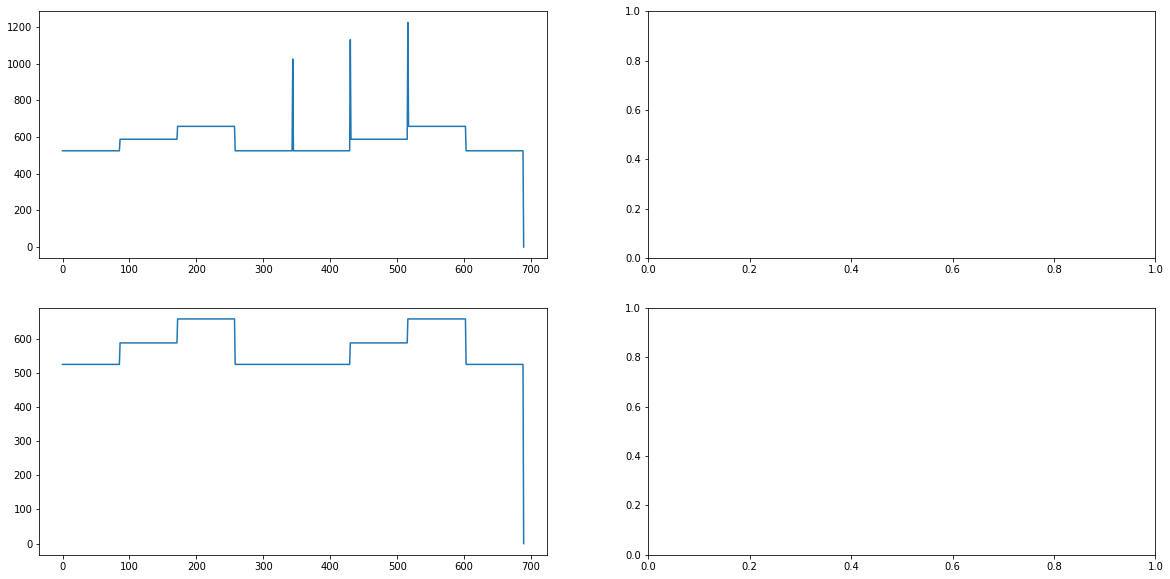

In [12]:
#Question 1.2 - Testing AMDF function
srate = 44100.0

def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

input = sinusoid()

pitch = pitch_amdf(input[0:512], srate)

# frequencies of three notes (C, D, E) 
c_freq = 523.0   
d_freq = 587.0  
e_freq = 659.0 

# generate sine signals corresponding to each note 
c_data = sinusoid(c_freq, 0.5, srate)
d_data = sinusoid(d_freq, 0.5, srate)
e_data = sinusoid(e_freq, 0.5, srate)

# form a simple melody by concateneting the signal arrays for each note 
melody1 = np.hstack([c_data, d_data, e_data, c_data, c_data, d_data, e_data, c_data])

def pitch_track(signal, hopSize, winSize, extractor): 
    offsets = np.arange(0, len(signal), hopSize)
    pitch_track = np.zeros(len(offsets))
    amp_track = np.zeros(len(offsets))
    
    for (m,o) in enumerate(offsets): 
        frame = signal[o:o+winSize] 
        pitch_track[m] = extractor(frame, srate)
        amp_track[m] = np.sqrt(np.mean(np.square(frame)))  

        if (pitch_track[m] > 1500): 
            pitch_track[m] = 0 
        
    return (amp_track, pitch_track)

# compute the pitch tracks 
(at1, pt1) = pitch_track(melody1, 256, 512, pitch_amdf)

# applying median filtering to smooth the pitch tracks 
pt3 = signal.medfilt(pt1, kernel_size=7)


plt.figure(figsize=(20,10)) 
plt.subplot(221)
plt.plot(pt1)
plt.subplot(222)
plt.subplot(223)
plt.plot(pt3)
plt.subplot(224)